In [ ]:
#colab 버전

# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium==4.1.5

Executing: /tmp/apt-key-gpghome.uhhHjdOZCL/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.NedxwyfjQ2/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.t4XgU8yyle/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

# 새 섹션

## 0.시연

### 기본시연.
질문 :

네이버에서 ‘반도체’관련 뉴스기사의 제목을 출력해주는 파이썬 프로그램을 만들어줘

In [ ]:
!pip install pandas
!pip install python-pptx
!pip install openpyxl==3.1.2
!pip install xlwt

In [ ]:
!pip install requests==2.28.2
import requests
from bs4 import BeautifulSoup

# 검색어와 URL 설정
search_word = '생성형AI'
url = f'https://search.naver.com/search.naver?query={search_word}&where=news'

# HTTP GET 요청
response = requests.get(url)

# BeautifulSoup을 이용해 HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 뉴스 기사 제목 추출
news_titles = soup.select('.news_tit')

# 출력
for title in news_titles:
    print(title.text)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.28.2 which is incompatible.
[단독] 네이버, 우크라이나 재건에 생성형 AI·디지털트윈 활용한다
학습량 높인 카카오 AI 아티스트 ‘칼로’…웹에서도 ‘편하게’ 사용
교보생명 “AI가 약관 설명해준다”…업계 최초 ‘챗GPT’ 도입
해커에 날개단 생성형 AI…많이 써보면서 경계해야
AI 의학분야 진출은 ‘성공적’, 인간 대신하기엔 ‘역부족’
'귀하신 몸' 생성형AI 개발자 확보 경쟁 치열…기업들 앞다퉈 공개 채용
'AI로 취업난 뚫자'…KT 에이블스쿨 잡페어 개최
6월 개미들이 쓸어 담은 네이버… ‘AI 서비스 비용’에 골머리
"인구감소 노동력 부족 AI가 대체...주 4일제 근무 견인할 것"
AI 앞세운 테크기업, 헬스케어로 영토 확장


In [ ]:
#write your code

## 기본시연2 - openai API

## 1.ChatGPT 현업소프트웨어 자동화 - 기본 업무 OS

### [실습1] (엑셀제작)창의적인 내용으로 엑셀 표 제작

In [ ]:
# 단순 표 제작

#수상 대상
q1 = "BHcode에서 야유회의 원활한 진행을 위해서 큰 힘을 주고 있는 임직원"
#상장 시작 문구
q2 = "위 사람은 BHcode에서 주최한 2023년 상반기 워크샵에서 기업문화 발전을 위해"
#상장 맺음말
q3 = "이에 상을 수여합니다."
#생성할 상장 개수
q4 = "5"
total_q = f"{q1}에게 수여할 재치있는 상장이름 {q4}개와 상장에 들어갈 200자 내외의 내용을 만들어주세요. \n 상장에 시작되는 문구는 '{q2}'로 해주시고 '{q3}'로 말을 끝내주세요.\n 수상자의 이름은 한글이름으로 무작위로 선정합니다. Please Generate in Table format with 3 columns. Column 1: '상장 이름', Column 2: '상장 내용', Column 3: '수상자' \n"
total_q

"BHcode에서 야유회의 원활한 진행을 위해서 큰 힘을 주고 있는 임직원에게 수여할 재치있는 상장이름 5개와 상장에 들어갈 200자 내외의 내용을 만들어주세요. \n 상장에 시작되는 문구는 '위 사람은 BHcode에서 주최한 2023년 상반기 워크샵에서 기업문화 발전을 위해'로 해주시고 '이에 상을 수여합니다.'로 말을 끝내주세요.\n 수상자의 이름은 한글이름으로 무작위로 선정합니다. Please Generate in Table format with 3 columns. Column 1: '상장 이름', Column 2: '상장 내용', Column 3: '수상자' \n"

In [ ]:
#write your code

In [ ]:
#질문0 - 면접 질문 만들기
#면접질문 대상
q1 = "BHcode IT교육 컨설팅직에 지원한 취업준비생 지원자 대상"
#알고 싶은 내용
q2 = "이 사람이 조직에서 얼마나 잘 적응할 수 있는지"
#마지막 문단
q3 = "에 대한 본인의 생각을 말해주세요"
#생성할 질문 개수
q4 = "5"
total_q = f"{q1}를 대상으로 할 질문 주제 {q4}개와 그 와 관련된 50자 내외의 질문을 만들어주세요. \n 질문의 의도는 '{q2}'로 해주시고 '{q3}'로 말을 끝내주세요.\n 질문에 대한 올바른 해답은 한글로 125자 내외로 무작위로 작성합니다. Please Generate python code in pandas DataFrame format and save to excel (q_list.xlsx). Column 1: '질문주제', Column 2: '질문내용' ,Columns 3 : 올바른 해답\n"
total_q

"BHcode IT교육 컨설팅직에 지원한 취업준비생 지원자 대상를 대상으로 할 질문 주제 5개와 그 와 관련된 50자 내외의 질문을 만들어주세요. \n 질문의 의도는 '이 사람이 조직에서 얼마나 잘 적응할 수 있는지'로 해주시고 '에 대한 본인의 생각을 말해주세요'로 말을 끝내주세요.\n 질문에 대한 올바른 해답은 한글로 125자 내외로 무작위로 작성합니다. Please Generate python code in pandas DataFrame format and save to excel (q_list.xlsx). Column 1: '질문주제', Column 2: '질문내용' ,Columns 3 : 올바른 해답\n"

In [ ]:
!pip install pandas
!pip install openpyxl==3.1.2
import pandas as pd
import openpyxl

questions = {
    "질문주제": [
        "성격 및 태도",
        "커뮤니케이션",
        "문제 해결 능력",
        "업무 관리 능력",
        "도전적인 상황에서의 대처"
    ],
    "질문내용": [
        "자신의 성격 및 태도에 대해 어떻게 생각하시나요?",
        "어떻게 하면 효과적으로 커뮤니케이션을 할 수 있을까요?",
        "문제를 해결하는 과정에서 가장 중요한 요소는 무엇이라고 생각하시나요?",
        "여러 가지 업무를 동시에 처리해야 할 때, 어떻게 업무를 관리하고 계획하시나요?",
        "도전적인 상황에서 당신의 대처 방식은 어떻게 되나요?"
    ],
    "올바른 해답": [
        "자신의 장단점을 파악하고 개선하려는 태도가 있어야 한다.",
        "상대방의 입장을 고려하고 명확하고 정확한 의사소통이 필요하다.",
        "문제 상황을 파악하고 이를 해결하기 위한 계획을 수립하며 실행하는 것이 중요하다.",
        "우선순위를 정하고, 일정을 계획하며, 업무를 단계별로 나누어 처리하는 것이 효과적이다.",
        "도전적인 상황에서도 긍정적인 태도를 유지하고, 문제 해결을 위해 창의적인 방법을 모색하는 것이 중요하다."
    ]
}

df = pd.DataFrame.from_dict(questions)
df.to_excel("q_list.xlsx", index=False)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 11.3 MB/s eta 0:00:00
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10


In [ ]:
#write your code

In [ ]:
#질문1 - 상장 만들기 --> 특정상황에서 창의적인 답안을 만들어내는 prompt , prize_list.xlsx 로 저장한다.

#수상 대상
q1 = "BHcode에서 야유회의 원활한 진행을 위해서 큰 힘을 주고 있는 임직원"
#상장 시작 문구
q2 = "위 사람은 BHcode에서 주최한 2023년 상반기 워크샵에서 기업문화 발전을 위해"
#상장 맺음말
q3 = "이에 상을 수여합니다."
#생성할 상장 개수
q4 = "5"
total_q = f"{q1} {q4}명에게 수여할 재치있는 상장이름 {q4}개와 상장에 들어갈 200자 내외의 내용을 만들어주세요. \n 상장에 시작되는 문구는 '{q2}'로 해주시고 '{q3}'로 말을 끝내주세요.\n 수상자의 이름은 한글이름으로 무작위로 선정합니다. Please Generate python code in pandas DataFrame format and save to excel (prize_list.xlsx). Column 1: '상장 이름', Column 2: '상장 내용', Column 3: '수상자' \n"

In [ ]:
total_q

"BHcode에서 야유회의 원활한 진행을 위해서 큰 힘을 주고 있는 임직원 5명에게 수여할 재치있는 상장이름 5개와 상장에 들어갈 200자 내외의 내용을 만들어주세요. \n 상장에 시작되는 문구는 '위 사람은 BHcode에서 주최한 2023년 상반기 워크샵에서 기업문화 발전을 위해'로 해주시고 '이에 상을 수여합니다.'로 말을 끝내주세요.\n 수상자의 이름은 한글이름으로 무작위로 선정합니다. Please Generate python code in pandas DataFrame format and save to excel (prize_list.xlsx). Column 1: '상장 이름', Column 2: '상장 내용', Column 3: '수상자' \n"

In [ ]:
import pandas as pd
import random

# 재치있는 상장이름과 내용 리스트
prize_names = ["빛나는 비즈니스 부스터", "열정 유발제", "창의성의 꽃", "혁신성장의 열쇠", "자유로운 아이디어 추진력"]
prize_contents = ["기업문화 발전에 끊임없는 열정을 발산해 주셨습니다.",
                  "참신한 아이디어와 열정적인 업무태도로 동료들에게 영감을 주셨습니다.",
                  "창의적인 사고력으로 BHcode의 경쟁력을 높이는 데 큰 공헌을 하셨습니다.",
                  "혁신적인 발상과 실행력으로 BHcode의 성장을 이끌어 주셨습니다.",
                  "자유로운 아이디어와 유연한 사고력으로 BHcode의 비전 실현에 큰 도움을 주셨습니다."]

# 임직원 이름 리스트 (무작위 생성을 위해 임시로 사용될 리스트)
employee_names = ["김영희", "박철수", "이승민", "최현우", "장민석", "홍길동", "신사임당", "이순신", "유관순"]

# 임직원 이름을 무작위로 선택해서 수상자 리스트 생성
winners = random.sample(employee_names, 5)

# DataFrame 생성
prize_df = pd.DataFrame(columns=["상장 이름", "상장 내용", "수상자"])

# DataFrame에 데이터 추가
for i in range(5):
    prize_name = random.choice(prize_names)
    prize_content = random.choice(prize_contents)
    employee_name = winners[i]
    prize_text = f"위 사람은 BHcode에서 주최한 2023년 상반기 워크샵에서 기업문화 발전을 위해 {prize_content} 이에 상을 수여합니다."
    prize_df.loc[i] = [prize_name, prize_text, employee_name]

# DataFrame을 엑셀 파일로 저장
prize_df.to_excel("prize_list.xlsx", index=False)


In [ ]:
#write your code

In [ ]:
#질문3- 머신러닝 회귀 코드 만들기

#머신러닝 모델명
model_prompt= "DecisionTree"
#오차선택방식
error_prompt= "MSE"
#학습데이터와 세트트 데이터 비율
ratio_prompt= "8:2"

#파라미터 최적화 grid-search에 사용되는 파라미터 개수
prameter_prompt= "5"

#최종 프롬프트
ml_prompt=f"""
회귀를 목표로 머신러닝 코드를 만들고 싶어. 사용되는 모델명은 {model_prompt}로 해주고, 오차체크 방식은 {error_prompt}로 만들어줘
그리고 학습데이터와 테스트데이터의 비율은 {ratio_prompt} 로 만들어주고 파라미터 최적화를 위해서 사용되는 gridsearchCV 에 사용되는 매개변수 개수는 {prameter_prompt}로 하는  파이썬 코드를 만들어줘"""
print(ml_prompt)


회귀를 목표로 머신러닝 코드를 만들고 싶어. 사용되는 모델명은 DecisionTree로 해주고, 오차체크 방식은 MSE로 만들어줘
그리고 학습데이터와 테스트데이터의 비율은 8:2 로 만들어주고 파라미터 최적화를 위해서 사용되는 gridsearchCV 에 사용되는 매개변수 개수는 5로 하는  파이썬 코드를 만들어줘


In [ ]:
#질문3- 머신러닝 분류 코드 만들기

#머신러닝 모델명
model_prompt= "XGBClassifier"
#오차선택방식
error_prompt= "precision"
#학습데이터와 세트트 데이터 비율
ratio_prompt= "8:2"
#최종 프롬프트
ml_prompt=f"""
분류를 목표로 머신러닝 코드를 만들고 싶어. 사용되는 모델명은 {model_prompt}로 해주고, 분류정확도 체케 방식은 {error_prompt}로 만들어줘
그리고 학습데이터와 테스트데이터의 비율은 {ratio_prompt} 로 만들어주는 파이썬 코드를 만들어줘"""
print(ml_prompt)


분류를 목표로 머신러닝 코드를 만들고 싶어. 사용되는 모델명은 XGBClassifier로 해주고, 분류정확도 체케 방식은 precision로 만들어줘
그리고 학습데이터와 테스트데이터의 비율은 8:2 로 만들어주는 파이썬 코드를 만들어줘


### [실습2-1] (엑셀제작)임의의 회사명 & 산업군 & 담당자명 구성된 엑셀 만들기

질문 :

대한민국에 실제로 있을법한 5개의 한글로 된 데이터를 회사명/산업군/담당자 으로 구성해줘. 그리고 그 내용을 company_info.xlsx라는 형태로 저장할 수 있는 파이썬 코드를 만들어줘

In [ ]:
import pandas as pd

# 데이터 프레임 생성
data = {'회사명': ['한국전력공사', '삼성전자', '현대자동차', 'SK하이닉스', 'LG화학'],
        '산업군': ['전력', '전자', '자동차', '반도체', '화학'],
        '담당자': ['김철수', '이영희', '박지원', '최영호', '김태준']}
df = pd.DataFrame(data)

# 엑셀 파일로 저장
df.to_excel('company_info.xlsx', index=False)


In [ ]:
#write your code

In [ ]:
df

회사명  산업군  담당자
0  한국전력공사   전력  김철수
1    삼성전자   전자  이영희
2   현대자동차  자동차  박지원
3  SK하이닉스  반도체  최영호
4    LG화학   화학  김태준

### [실습2-2] (PPT제작)제작된 .xlsx를 기반으로 제안서 만들기

In [ ]:
#기본 제안서 다운로드 - basic_designed.pptx
#pc/colab용
!pip install --upgrade gdown
import gdown
google_path = "https://drive.google.com/uc?id="
file_id = '1a1q1gKXdZ4A5lIgkPC-Gyu4QzjqO2Jgd'
output_name = "basic_designed.pptx"
gdown.download(google_path+file_id,output_name,quiet=False)

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From: https://drive.google.com/uc?id=1a1q1gKXdZ4A5lIgkPC-Gyu4QzjqO2Jgd
To: /content/basic_designed.pptx
100%|██████████| 3.61M/3.61M [00:00<00:00, 100MB/s]


'basic_designed.pptx'

질문 :

basic_designed.pptx 파일에 {회사명}/{산업군}/{담당자} 을 찾아서 company_info.xlsx의 열 데이터인 회사명/산업군/담당자의 데이터로 치환해서 .pptx로 저장해주는 파이썬 코드를 만들어줘.이 때 기존의 basic_designed.pptx 의 글씨체와 글씨크기는 유지해줘

In [ ]:
!pip install python-pptx
from pptx import Presentation
import pandas as pd

# company_info.xlsx 파일을 읽어서 데이터 프레임 생성
df = pd.read_excel('company_info.xlsx')

# 파워포인트 파일 열기
prs = Presentation('basic_designed.pptx')

# 각 슬라이드에 있는 텍스트를 추출하여 치환하기
for slide in prs.slides:
    for shape in slide.shapes:
        if shape.has_text_frame:
            text_frame = shape.text_frame
            for paragraph in text_frame.paragraphs:
                for run in paragraph.runs:
                    text = run.text
                    if '{회사명}' in text:
                        run.text = text.replace('{회사명}', df['회사명'].iloc[0])
                    if '{산업군}' in text:
                        run.text = text.replace('{산업군}', df['산업군'].iloc[0])
                    if '{담당자}' in text:
                        run.text = text.replace('{담당자}', df['담당자'].iloc[0])

# 결과 파워포인트 파일 저장
prs.save('result.pptx')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 14.6 MB/s eta 0:00:00


In [ ]:
#write your code

질문 :

위 코드를 기반으로  1개의 PPT가 아닌 company_info.xlsx 에 있는 5개의 데이터를 모두 적용시켜서 5개의 PPTx를 만들어줘.

In [ ]:
from pptx import Presentation
import pandas as pd

# company_info.xlsx 파일을 읽어서 데이터 프레임 생성
df = pd.read_excel('company_info.xlsx')

# 파워포인트 파일 열기
# prs = Presentation('basic_designed.pptx')

# company_info.xlsx 파일에 있는 각 데이터에 대해 처리하기
for i in range(len(df)):
    # 파워포인트 파일을 복사하여 새 파일 생성
    new_prs = Presentation('basic_designed.pptx')

    # 각 슬라이드에 있는 텍스트를 추출하여 치환하기
    for slide in new_prs.slides:
        for shape in slide.shapes:
            if shape.has_text_frame:
                text_frame = shape.text_frame
                for paragraph in text_frame.paragraphs:
                    for run in paragraph.runs:
                        text = run.text
                        if '{회사명}' in text:
                            run.text = text.replace('{회사명}', df['회사명'].iloc[i])
                        if '{산업군}' in text:
                            run.text = text.replace('{산업군}', df['산업군'].iloc[i])
                        if '{담당자}' in text:
                            run.text = text.replace('{담당자}', df['담당자'].iloc[i])

    # 결과 파워포인트 파일 저장
    new_prs.save(f'result_{i+1}.pptx')


In [ ]:
#write your code

### [실습3] (파일처리)파일 이름 변경하기

질문 :

Create python code to create excel1.xls ~ excel100.xls without folder.

In [ ]:
!pip install xlwt
import os
import xlwt

for i in range(1, 101):
    filename = f"excel{i}.xls"
    workbook = xlwt.Workbook()
    sheet = workbook.add_sheet("Sheet 1")
    sheet.write(0, 0, "Hello World!")
    workbook.save(filename)

In [ ]:
#write your code

ModuleNotFoundError: ignored

질문 :

excel1.xls ~ excel100.xls 라는 파일을 excel001.xls ~ excel100.xls 로 이름을 변경하는 프로그램을 만들어줘

In [ ]:
import os

# 1부터 100까지의 엑셀 파일 생성
for i in range(1, 101):
    filename = f"excel{i}.xls"
    open(filename, 'w').close()  # 파일 생성

# 이름 변경
for i in range(1, 101):
    old_filename = f"excel{i}.xls"
    new_filename = f"excel{i:03d}.xls"
    os.rename(old_filename, new_filename)

In [ ]:
#writer your code


excel1.xls -> excel001.xls로 변경되었습니다.
excel2.xls -> excel002.xls로 변경되었습니다.
excel3.xls -> excel003.xls로 변경되었습니다.
excel4.xls -> excel004.xls로 변경되었습니다.
excel5.xls -> excel005.xls로 변경되었습니다.
excel6.xls -> excel006.xls로 변경되었습니다.
excel7.xls -> excel007.xls로 변경되었습니다.
excel8.xls -> excel008.xls로 변경되었습니다.
excel9.xls -> excel009.xls로 변경되었습니다.
excel10.xls -> excel010.xls로 변경되었습니다.
excel11.xls -> excel011.xls로 변경되었습니다.
excel12.xls -> excel012.xls로 변경되었습니다.
excel13.xls -> excel013.xls로 변경되었습니다.
excel14.xls -> excel014.xls로 변경되었습니다.
excel15.xls -> excel015.xls로 변경되었습니다.
excel16.xls -> excel016.xls로 변경되었습니다.
excel17.xls -> excel017.xls로 변경되었습니다.
excel18.xls -> excel018.xls로 변경되었습니다.
excel19.xls -> excel019.xls로 변경되었습니다.
excel20.xls -> excel020.xls로 변경되었습니다.
excel21.xls -> excel021.xls로 변경되었습니다.
excel22.xls -> excel022.xls로 변경되었습니다.
excel23.xls -> excel023.xls로 변경되었습니다.
excel24.xls -> excel024.xls로 변경되었습니다.
excel25.xls -> excel025.xls로 변경되었습니다.
excel26.xls -> excel026.xls로 변경되었습니다.
excel27.xls -> excel0

- 응용 (공유폴더 파일정리)
- https://chat.openai.com/share/b6758af1-b21d-478e-b0a6-493ca53c3a3d

In [ ]:
#파일생성
import random
import string
import os

extensions = ['.pptx', '.xlsx', '.docx', '.pdf']
file_types = ['제안서', '견적서', '보고서', '양식']
companies = ['삼성전자', 'LG전자', '네이버', '카카오', '구글', '애플', '마이크로소프트', '아마존']

def generate_random_filename():
    company_name = random.choice(companies)
    file_type = random.choice(file_types)
    file_extension = random.choice(extensions)
    random_number = random.randint(1, 1000)
    random_string = ''.join(random.choices(string.ascii_lowercase, k=5))
    filename = f'{company_name}_{file_type}_{random_string}_{random_number}{file_extension}'
    return filename

# 파일 생성 및 작업 수행
for _ in range(100):
    filename = generate_random_filename()
    print(filename)

    # 파일 생성
    with open(filename, 'w') as file:
        # 파일 작업 수행 (예: 파일에 내용 작성)
        file.write("파일 작성 예시")

    # 원하는 디렉토리에 파일 생성하기 위해 경로 설정
    # directory_path = '/path/to/directory'
    # file_path = os.path.join(directory_path, filename)
    # with open(file_path, 'w') as file:
    #     file.write("파일 작성 예시")


구글_제안서_tyhsa_235.docx
네이버_제안서_ccluv_328.pptx
구글_제안서_faggs_433.pdf
삼성전자_제안서_smqds_20.docx
마이크로소프트_견적서_pqlxg_47.pdf
애플_견적서_obdbs_811.docx
구글_견적서_hxrhq_698.pdf
삼성전자_제안서_tgazq_810.xlsx
LG전자_양식_xiuoh_512.pdf
애플_제안서_tccnc_928.pptx
마이크로소프트_견적서_rnzvt_938.xlsx
마이크로소프트_제안서_xlxfr_562.xlsx
삼성전자_제안서_kbucw_464.pdf
LG전자_견적서_yclnr_236.docx
마이크로소프트_보고서_lyjtv_790.xlsx
네이버_제안서_dahgf_788.pdf
카카오_견적서_kufla_272.pdf
네이버_제안서_snmtd_540.pdf
마이크로소프트_견적서_bxume_168.pptx
아마존_양식_twxum_204.xlsx
네이버_양식_eldrg_900.pdf
구글_제안서_zwyqx_883.pdf
LG전자_보고서_ifpap_459.docx
애플_제안서_pbvtn_740.pdf
카카오_양식_ujdgh_135.pptx
구글_보고서_nrake_98.pdf
카카오_보고서_iixvi_81.pdf
아마존_견적서_aohxc_312.xlsx
카카오_보고서_sjurs_768.docx
삼성전자_견적서_xgexu_719.xlsx
마이크로소프트_보고서_mhqdb_176.pptx
아마존_보고서_puzhp_59.pdf
마이크로소프트_보고서_unoqw_971.pdf
구글_보고서_rdxam_391.docx
구글_제안서_dfbso_644.pdf
네이버_보고서_mkmdt_881.xlsx
애플_보고서_xguaj_681.pptx
구글_양식_peieo_801.pdf
애플_보고서_oxnsy_524.pptx
아마존_제안서_zzzgx_490.pptx
삼성전자_제안서_jwfyk_495.pdf
카카오_제안서_qcrng_967.xlsx
카카오_견적서_yrijl_481.docx
네이버_보고서_egkit_82

In [ ]:
#폴더정리
import os
import shutil

# 폴더 생성 및 파일 정리
def organize_files():
    # 파일들을 검색하고 분류할 폴더 생성
    folders = {
        '.xlsx': {
            '엑셀_제안서': lambda filename: '제안서' in filename,
            '엑셀_견적서': lambda filename: '견적서' in filename,
            '엑셀_기타': lambda filename: '제안서' not in filename and '견적서' not in filename
        },
        '.docx': {
            '워드_양식': lambda filename: '양식' in filename,
            '워드_기타': lambda filename: '양식' not in filename
        },
        '.pptx': {
            'PPT_양식': lambda filename: '양식' in filename,
            'PPT_보고서': lambda filename: '보고서' in filename,
            'PPT_기타': lambda filename: '양식' not in filename and '보고서' not in filename
        },
        '.pdf': {
            'PDF_견적서': lambda filename: '견적서' in filename,
            'PDF_기타': lambda filename: '견적서' not in filename
        }
    }

    for extension, folder_info in folders.items():
        for folder_name, condition in folder_info.items():
            os.makedirs(folder_name, exist_ok=True)

            # 현재 폴더의 파일들을 확인하고 분류된 폴더로 이동
            for filename in os.listdir('.'):
                if os.path.isfile(filename) and filename.endswith(extension):
                    if condition(filename):
                        new_path = os.path.join(folder_name, filename)
                        shutil.move(filename, new_path)

# 폴더 생성 및 파일 정리 함수 호출
organize_files()


### [실습4] (엑셀결합) 수십개의 엑셀데이터 결합하기

In [ ]:
#데이터 다운로드
!pip install xlwt==1.3.0
!pip install pandas==1.5.0
import pandas as pd
# [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
!pip install gdown==4.5.1
import gdown
import zipfile
print(gdown.__version__)
google_path = "https://drive.google.com/uc?id="
file_id = '1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH'
output_name = "2.data_edit.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("2.data_edit.zip")
fantasy_zip.extractall()
google_path = "https://drive.google.com/uc?id="
file_id = '1gkjNoNIx5vdBNVGH91NlIG4DL5obyAgQ'
output_name = "강의준비자료_COLAB용데이터.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("강의준비자료_COLAB용데이터.zip")
fantasy_zip.extractall()

# https://drive.google.com/file/d/1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH/view?usp=sharing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.0 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14931 sha256=6e22bf6cf5cd96cd0922adef3b6c39d35350e6a4e208e5acd6a6f9c6e42205e4
  Stored in directory: /root/.cache/pip/wheels/38/72/83/dab5cb8321023eb1549d7a7d7f564b479ed4cf71edb70ddad6
Successfully built gdown
  At

Downloading...
From: https://drive.google.com/uc?id=1Wr-r1eoP9jqUjL1fJ_-KrJSm2c46wLFH
To: /content/2.data_edit.zip
100%|██████████| 295k/295k [00:00<00:00, 82.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gkjNoNIx5vdBNVGH91NlIG4DL5obyAgQ
To: /content/강의준비자료_COLAB용데이터.zip
100%|██████████| 701k/701k [00:00<00:00, 92.4MB/s]


질문 : new_data2 안에 있는 모든 엑셀을 찾아서 각각의 데이터를 하나로 합치는 파이썬 코드를 만들어줘줘

In [ ]:
!pip install pandas openpyxl
import os
import pandas as pd

folder_path = 'new_data2'
all_files = os.listdir(folder_path)

# 엑셀 파일만 선택
excel_files = [file for file in all_files if file.endswith('.xlsx') or file.endswith('.xls')]

# 각 엑셀 파일을 데이터프레임으로 읽은 다음, 리스트에 저장
dataframes = [pd.read_excel(os.path.join(folder_path, file)) for file in excel_files]

# 모든 데이터프레임을 하나로 합침
combined_dataframe = pd.concat(dataframes, ignore_index=True)

# 결과를 새 엑셀 파일로 저장
combined_dataframe.to_excel('conbined_data.xlsx', index=False)

In [ ]:
#write your code


## 2.ChatGPT를 활용한 웹크롤러 제작 (Jupyter Notebook)

In [ ]:
#실습에 필요한 라이브러리 가져오기(추후 설명 예정)

#PC버전
!pip install selenium==4.1.5
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.4/979.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: selenium
    Found existing installation: selenium 4.9.1
    Uninstalling selenium-4.9.1:
      Successfully uninstalled selenium-4.9.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[WDM] - Downloading: 100%|██████████| 6.98M/6.98M [00:00<00:00, 168MB/s]


WebDriverException: ignored

In [ ]:
# #colab 버전
# !pip install selenium==4.1.5
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin
# import datetime
# import time
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver
# options = webdriver.ChromeOptions()
# options.add_argument('--headless')
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# driver = webdriver.Chrome('chromedriver', options=options)

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://deb.debian.org/debian buster-updates InRelease
Hit:5 http://deb.debian.org/debian-security buster/updates InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

TypeError: ignored

#### 2-1-1.Selenium 기반 크롤러 만들어 보기

In [ ]:
#PC버전
!pip install selenium==4.1.5
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)

In [ ]:
# 인터넷 열기 ( driver = webdriver.Chrome(~~~))

# 인터넷 접속하기 ( .get("원하는 웹사이트"))

# 원하는 요소 찾기 ( xpath / id / class / tag_name)

# 원하는 요소에 데이터 넣기 ( .send_keys())

# 원하는 요소를 클릭하기( .click())

# 기다리기( time.sleep(3))


In [ ]:
#write your code


#### 2-1-2. 미션수행 :

 파이썬 selenium으로 네이버 "ChatGPT" 단어 검색 후 관련 뉴스기사를 제목을 출력하고 엑셀로 제작하여라.


In [ ]:
#write your code (아무 가이드 없이 한번 풀어보세요)

###### 2-1-2-1. 사전세팅 ChatGPT에게 나의 코드를 미리 보여주기(질문)

In [ ]:
#prompt
"""
내가 아는 내용으로 파이썬 selenium 을 활용한 크롤링을 할거야. 아래의 조건을 기억해줘
1) 아래의 코드를 사용해서 크롬브라우저 객체를 driver변수에 저장해두었어.
!pip install selenium==4.1.5
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)

2) 요소를 찾을 때는 driver.find_element(By.~~ ) 형태로 문법을 통일해줘

3) CLASS_NAME만을 활용해서 요소를 찾아줘
"""

In [ ]:
#write your code

###### 2-1-2-2 - 파이썬 selenium으로 네이버 "ChatGPT" 단어 검색 후 관련 뉴스기사를 제목을 출력하여라

In [ ]:
#prompt
"""
- 파이썬 selenium으로 네이버 "ChatGPT" 단어 검색 후 관련 뉴스기사를 제목을 출력하여라
1 ) https://search.naver.com/search.naver?where=news&sm=tab_jum&query=ChatGPT 에 접속해줘
2 ) 뉴스기사 제목이 담겨있는 요소(클래스명 : news_tit)를 LIST로 저장해줘
3 ) 저장한 LIST를 하나씩 반복문을 통해서 제목을 출력해줘
"""

In [ ]:
#write your code

###### 2-1-2-3 -위에서 출력된 기사제목을 엑셀로 저장해줘

In [ ]:
#prompt
"""
위에서 출력된 기사제목을 엑셀로 저장해줘
"""

In [ ]:
#write your codeaa

#### 2-2.Openai API

##### 2-2-1.단순기능확인

In [ ]:
import getpass
pw = getpass.getpass("비밀번호:")
!pip install openai
import os
import openai

openai.api_key = pw

response = openai.Completion.create(
  model="text-davinci-003",
  prompt="반가워",
  temperature=0,
  max_tokens=64,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=["\"\"\""]
)

비밀번호:··········
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
type(response)

openai.openai_object.OpenAIObject

In [ ]:
response

<OpenAIObject text_completion id=cmpl-7H3vMFGa1IS3mxBDcAJinhLTZz2Ks at 0x7fdccc6025c0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\uc694\n\n\uc800\ub3c4 \ubc18\uac11\uc2b5\ub2c8\ub2e4! \ubb34\uc5c7\uc744 \ub3c4\uc640\ub4dc\ub9b4\uae4c\uc694?"
    }
  ],
  "created": 1684301016,
  "id": "cmpl-7H3vMFGa1IS3mxBDcAJinhLTZz2Ks",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 52,
    "prompt_tokens": 9,
    "total_tokens": 61
  }
}

In [ ]:
response['choices'][0]['text']

'요\n\n저도 반갑습니다! 무엇을 도와드릴까요?'

##### 2-2-2.자주사용할 수 있는 함수로 제작

In [ ]:
# api key 비밀로 입력받기
import getpass
pw=getpass.getpass("openai API 키 : ")
# openai API활용을 위한 코드묶음 다운받기
!pip install openai
import openai
openai.api_key = pw
# 현재 사용하고 있는 컴퓨터의 파일을 컨트롤해주는 코드묶음 가져와서 jupyter notebook에서 사용하기
import os

# chatGPT API 활용할 수 있는 함수 만들기
def bhGPT_normal(x):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=x,
  temperature=0.5,
  max_tokens=1000,
  top_p=0.9,
  frequency_penalty=0.5,
  presence_penalty=0,
  stop=["\"\"\""]
  )
  return response['choices'][0]['text']

openai API 키 : ··········
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
bhGPT_normal("파이썬 RPA의 미래는 어떻게 될까?")

'\n\n파이썬 RPA의 미래는 매우 밝게 빛날 것으로 예상됩니다. 파이썬 RPA은 인공지능(AI)과 머신러닝(ML) 기술과 함께 사용하면 작업 속도, 정확도, 효율 등이 크게 향상될 것으로 예상합니다. 따라서, RPA 작업은 AI/ML을 사용하거나 AI/ML을 통해 자동화할 수 있다. 미래 RPA은 AI/ML과 IoT(Internet of Things) 기술을 통해 더 높은 스피드, 높은 정확도, 높은 효율을 달성할 것'

In [ ]:
#write your code

#### 2-3 .기본 RPA - 지식인 댓글 봇

- 네이버 아이디/비번 로그인을 반드시 해보고 실습에 참여하세요

##### 2-3-0. 네이버 로그인

In [ ]:
# 집어넣어야 하는 정보
import getpass

naver_id = input('네이버 ID : ')
naver_pw = getpass.getpass('네이버 비밀번호 : ')
apikey = getpass.getpass('openai 제공 API 키 : ')
# keyword = input('검색을 원하는 단어')
import time
st =1
#인터넷접속
## 설계
#### 1.아이피 설정하여 인터넷 오픈
!pip install selenium==4.1.5
!pip install webdriver_manager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
service = Service(executable_path=ChromeDriverManager().install()) #크롬드라이버 설치
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
driver = webdriver.Chrome(service=service)

time.sleep(st)

#로그인
#### 2.네이버 로그인
#login
#naver_login
import time

driver.get("https://www.naver.com")
naver_login_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[2]/div/div[1]/div[1]/div/a')
naver_login_button.click()
time.sleep(3)
# 로그인 아이디,비밀번호를 설정해서 진행한다.
driver.execute_script(f"document.getElementById('id').value = '{naver_id}'")
driver.execute_script(f"document.getElementById('pw').value = '{naver_pw}'")

time.sleep(3)

naver_login_button2 = driver.find_element_by_xpath('//*[@id="log.login"]')
naver_login_button2.click()

In [ ]:
#write your code

##### 2-3-1.일반RPA

In [ ]:
#지식인접속
#지식인에서 '파이썬독학'이라는 단어를 검색하고, 최신글 순서로 변경
# driver.get(f'https://kin.naver.com/search/list.naver?query={keyword}&section=kin&sort=date')
driver.get('https://kin.naver.com/search/list.naver?query=파이썬&section=kin&sort=date')

time.sleep(st)
#추출되는 모든 URL을 리스트에 담기
sel_list = driver.find_element(By.CLASS_NAME,'basic1').find_elements(By.TAG_NAME,'li')
url_list = []
for sel_unit in sel_list:
    url = sel_unit.find_element(By.TAG_NAME,'a').get_attribute('href')
    url_list.append(url)

time.sleep(st)

for url in url_list[:5]:
    try:
      #지식인 질문가져오는 유니트 코드
      driver.get(url)
      main_contents = driver.find_element(By.CLASS_NAME,'c-heading__content').text

  #################################################################################################
      #그 질문을 기반으로 답변을 하는 bot 제작
      answer = "고생많으셨어요! 화이팅입니다. 앞으로 궁금하시다면? 이 강의를 들어보시면 좋을 것 같아요! https://open.kakao.com/o/gUsFTJ7e "

  #################################################################################################
      #글 업로드하기
      # 댯굴 클릭하기
      driver.find_element(By.CLASS_NAME,'icon.icon_compose_opinion').click()
      time.sleep(st)

      # 댓글 쓰기
      write_sel = driver.find_element(By.CLASS_NAME,'c-opinion__write-textarea.placeholder')
      write_sel.send_keys(answer)
      time.sleep(st+5)

      # 댓글 올리기
      last_sel = driver.find_element(By.CLASS_NAME,"button_register._registerCommentBtn")
      time.sleep(st)

      #실제댓글은...달라져야겠지만

      # last_sel.click()
    except:
      print("다음으로")

In [ ]:
# write your code

##### 2-3-2.지능형RPA

In [ ]:
time.sleep(st)

#지식인접속
#지식인에서 '파이썬독학'이라는 단어를 검색하고, 최신글 순서로 변경
# driver.get(f'https://kin.naver.com/search/list.naver?query={keyword}&section=kin&sort=date')
driver.get('https://kin.naver.com/search/list.naver?query=파이썬&section=kin&sort=date')

time.sleep(st)
#추출되는 모든 URL을 리스트에 담기
sel_list = driver.find_element(By.CLASS_NAME,'basic1').find_elements(By.TAG_NAME,'li')
url_list = []
for sel_unit in sel_list:
    url = sel_unit.find_element(By.TAG_NAME,'a').get_attribute('href')
    url_list.append(url)

time.sleep(st)

for url in url_list[:3]:
    try:
      #지식인 질문가져오는 유니트 코드
      driver.get(url)
      main_contents = driver.find_element(By.CLASS_NAME,'c-heading__content').text

  # ###############################################################################################
  #     #그 질문을 기반으로 답변을 하는 bot 제작
  #     main2 = main_contents.replace('\n',' ')
  #     plus = f"아래와 같은 질문이 있어, \n\n {main2}\n\n\n 이 질문에 친절하고 짧게 대답해줄래?"
  #     answer = bhGPT_normal(plus)
  #     answer = answer + "\n  앞으로 궁금하시다면? 이 강의를 들어보시면 좋을 것 같아요! https://open.kakao.com/o/gUsFTJ7e"
  #     # print(plus)
  # ###############################################################################################

      #글 업로드하기
      # 댯굴 클릭하기
      driver.find_element(By.CLASS_NAME,'icon.icon_compose_opinion').click()
      time.sleep(st)

      # 댓글 쓰기
      write_sel = driver.find_element(By.CLASS_NAME,'c-opinion__write-textarea.placeholder')
      write_sel.send_keys(answer)
      time.sleep(st+5)

      # 댓글 올리기
      last_sel = driver.find_element(By.CLASS_NAME,"button_register._registerCommentBtn")
      time.sleep(st)

      #실제댓글은...달라져야겠지만

      # last_sel.click()
    except:
      print('다음으로')

In [ ]:
# write your code

# 3.ChatGPT를 활용한 지능형 이메일 제작

#### 3-1. Gmail 세팅

- 3-1-1) 지메일 로그인
- 3-1-2) 메일 설정 클릭(모든설정클릭)
- 3-1-3) 전달 및 POP/IMAP 클릭
- 3-1-4) Imap 액세스 - IMAP 사용 클릭
- 3-1-5) 변경사항 저장
- 3-1-7) https://myaccount.google.com/security
- 3-1-8) google에 로그인 탭에서 2단계 인증
- 3-1-9) 맨 밑에 앱 비밀번호 클릭
- 3-1-10) 앱 비밀번호 생성 (앱(메일) 선택, PC컴퓨터선택)
- 3-1-11) 생성된 앱 비밀번호 저장

#### 3-2. 발신

##### 3-2-1. 기본발신



- 질문 :

smtplib을 활용해서 파이썬으로 생성된 앱 비밀번호로 지메일 전송하는 코드를 생성해줘

In [ ]:

import getpass
my_gmail = input("gmail주소(수/발신):")
pw = getpass.getpass("비밀번호:")
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

# 이메일 발신인/수신인 정보
sender_email = my_gmail  # 발신인 이메일 주소
receiver_email = my_gmail # 수신인 이메일 주소

# 이메일 메시지 작성
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = "제목: 이메일 보내기 테스트"   # 이메일 제목
body = "안녕하세요? 이메일 전송을 테스트합니다."   # 이메일 내용
msg.attach(MIMEText(body, 'plain'))

# Gmail SMTP 서버 설정
smtp_server = smtplib.SMTP('smtp.gmail.com', 587)
smtp_server.starttls()   # TLS 보안 시작
smtp_server.login(sender_email, pw)   # 발신인 이메일 주소와 앱 비밀번호로 로그인

# 이메일 발송
text = msg.as_string()
smtp_server.sendmail(sender_email, receiver_email, text)
smtp_server.quit()


In [ ]:
#write your code

##### 3-2-2.발신메일 함수만들기

- 질문 :

위 코드를 기반으로 수신이메일/제목/본문 의 매개변수로 구성된 함수를 만들어줘

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(receiver_email, subject, body,pw): #송/수신메일,제목,본문,앱비밀번호호
    # 이메일 발신인 정보
    sender_email = receiver_email  # 발신인 이메일 주소

    # 이메일 메시지 작성
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject   # 이메일 제목
    msg.attach(MIMEText(body, 'plain'))

    # Gmail SMTP 서버 설정
    smtp_server = smtplib.SMTP('smtp.gmail.com', 587)
    smtp_server.starttls()   # TLS 보안 시작
    smtp_server.login(sender_email, pw)   # 발신인 이메일 주소와 앱 비밀번호로 로그인

    # 이메일 발송
    text = msg.as_string()
    smtp_server.sendmail(sender_email, receiver_email, text)
    smtp_server.quit()


In [ ]:
send_email(my_gmail,'세번째 제목','세번째 본문',pw)

In [ ]:
#write your code

##### 3-2-3.5개의 다른 제목과 본문 만들기

- 질문:

5개의 매력있는 애견홍보관련 메일 제목(10자내외)과 본문(30자내외)을 만들어주고 그 내용을 파이썬 리스트로 만들어줘, 양식은 아래와 같아.

email_contents = [{'subject':'무료 산책서비스','body':'귀여운 멍멍이와 함께 주말을 보내세요!'},
{~ ~ },
{~ ~ },]

In [ ]:
# 메일 제목과 본문을 각각 subject, body 변수에 저장
subject1 = "멍멍이 치과 할인 이벤트"
body1 = "신규 가입고객 50% 할인!"

subject2 = "반려견 교육 관련 교육 자료 안내"
body2 = "반려견 교육 방법에 대한 정보를 공유합니다."

subject3 = "무료 산책서비스"
body3 = "귀여운 멍멍이와 함께 주말을 보내세요!"

subject4 = "펫샵 상품 할인 안내"
body4 = "다양한 반려동물 상품을 저렴한 가격에 만나보세요."

subject5 = "반려견 안전 용품 추천"
body5 = "반려견의 안전을 위한 다양한 용품을 소개합니다."

# 메일 제목과 본문을 이용하여 딕셔너리 리스트 생성
email_contents = [
    {'subject': subject1, 'body': body1},
    {'subject': subject2, 'body': body2},
    {'subject': subject3, 'body': body3},
    {'subject': subject4, 'body': body4},
    {'subject': subject5, 'body': body5}
]


In [ ]:
#write your code

In [ ]:
for a in email_contents:
  print("제목:",a['subject'],"/본문:",a['body'])

In [ ]:
#write your code

##### 3-2-4.직접 코딩짜기

In [ ]:
for a in email_contents:
  print(a['subject'],a['body'])
  send_email(my_gmail,a['subject'],a['body'],pw)

In [ ]:
#write your code

##### 3-2-5.이쁜 이메일로 보내기 (시연)

- 질문 :


5개의 매력있는 애견홍보관련 메일 제목(10자내외)과 본문(30자내외)을 만들어주고 그 내용을 파이썬 리스트로 만들어줘. 그리고 만들어진 body를 이메일 본문에 넣을건데 HTML 코드로 예쁘게 디자인 된 형태로 만들거야 아래의 HTML 코드를 참조해서 새로운 email_contents를 만들어줘

아래의 코드를 참조해줘

def my_html(x):
    body = f"""
    <!DOCTYPE html>
    <html>

    <head>
        <title></title>
    </head>

    <body style="color: rgb(0, 0, 0); background-color: rgb(255, 255, 255);">
        <p><strong><u><span style="color: rgb(247, 218, 100);">{x}</span></u></strong></p>
    </body>

    </html>
    """
    return body


email_contents = [{'subject':'무료 산책서비스','body':my_html('당신의 애견을 즐겁게 산책시켜드릴께요!')},
{'subject':~~~,'body':~~~},
{~~},
{~~},
{~~}]

In [ ]:
email_contents = [
    {'subject': '멍멍이 새로운 친구 찾아요', 'body': '<p><strong><span style="color: red; font-size: 20px;">초보자를 위한 반려견 입양 상담 가능합니다.</span></strong></p>'},
    {'subject': '애견 반려 문화 확산합니다', 'body': '<p><strong><span style="color: red; font-size: 20px;">당신의 작은 노력이 대한민국 반려견 문화를 만듭니다.</span></strong></p>'},
    {'subject': '지금 바로! 애견 산책 가이드북', 'body': '<p><strong><span style="color: red; font-size: 20px;">우리집 멍멍이와 함께 더 즐겁고 안전한 산책을 해보세요.</span></strong></p>'},
    {'subject': '맞춤형 애견 서비스 제공합니다', 'body': '<p><strong><span style="color: red; font-size: 20px;">고객님의 요구에 따라 최고의 서비스를 제공합니다.</span></strong></p>'},
    {'subject': '입맞춤 까지! 맞춤형 강아지 사료 추천', 'body': '<p><strong><span style="color: red; font-size: 20px;">우리 집 강아지를 위한 최적의 사료를 추천해드립니다.</span></strong></p>'}
]


In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_html(receiver_email, subject, body,pw):
    # 이메일 발신인 정보
    sender_email = receiver_email   # 발신인 이메일 주소

    # 이메일 메시지 작성
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject   # 이메일 제목
    msg.attach(MIMEText(body, 'html'))

    # Gmail SMTP 서버 설정
    smtp_server = smtplib.SMTP('smtp.gmail.com', 587)
    smtp_server.starttls()   # TLS 보안 시작
    smtp_server.login(sender_email, pw)   # 발신인 이메일 주소와 앱 비밀번호로 로그인

    # 이메일 발송
    text = msg.as_string()
    smtp_server.sendmail(sender_email, receiver_email, text)
    smtp_server.quit()

In [ ]:
for a in email_contents:
  # print(a['subject'],a['body'])
  send_email_html(my_gmail,a['subject'],a['body'],pw)

In [ ]:
#참고사항  - word to html

#### 3-3.수신(실행해보기)

In [ ]:
import getpass
email_id = input("본인의 지메일: ")
email_app_pw = getpass.getpass("발급받은 16자리 코드를 주세요:")
import imaplib
imap = imaplib.IMAP4_SSL('imap.gmail.com')
imap.login(email_id, email_app_pw)
# 사서함의 모든 메일의 uid 정보 가져오기
imap.select(mailbox="INBOX")
# 만약 특정 발신 메일만 선택하고 싶다면 'ALL' 대신에 '(FROM "xxxxx@naver.com")' 입력
# 결과값이 status는 처리상태 / messages는 모든 메일(수신,발신등)
status, messages = imap.uid('search', None, 'ALL')
#출력된 uuid를 list로 저장하기
messages = messages[0].split()
# 0이 가장 마지막 메일, -1이 가장 최신 메일
recent_email = messages[-1]

In [ ]:
#수신메일 확인하기
from bs4 import BeautifulSoup
import email
from email.header import decode_header, make_header
def read_email(recent_email):
  # fetch 명령어로 메일 가져오기
  res, msg = imap.uid('fetch', recent_email, "(RFC822)")

  # 사람이 읽을 수 있는 없는 상태의 이메일
  raw = msg[0][1]
  # 사람이 읽을 수 있는 형태로 변환
  raw_readable = msg[0][1].decode('utf-8')
  # raw_readable에서 원하는 부분만 파싱하기 위해 email 모듈을 이용해 변환
  email_message = email.message_from_string(raw_readable)
  # 보낸사람
  fr = make_header(decode_header(email_message.get('From')))
  # 메일 제목
  subject = make_header(decode_header(email_message.get('Subject')))
  # 메일 내용
  if email_message.is_multipart():
      for part in email_message.walk():
          ctype = part.get_content_type()
          cdispo = str(part.get('Content-Disposition'))
          if ctype == 'text/plain' and 'attachment' not in cdispo:
              body = part.get_payload(decode=True)  # decode
              break
  else:
      body = email_message.get_payload(decode=True)
  try:
      body = body.decode('utf-8')
  except:
      body = "i can not find body"

  soup = BeautifulSoup(body, 'html.parser')
  main_text = soup.get_text()
  mail_get_list = [str(fr),str(subject),main_text]
  return mail_get_list

In [ ]:
#recent 10 mail save code (최근 20개의 이메일 수신내용확인가능)
my_list = []
import time
time.sleep(10) #메일수신 체크를 위한 대기시간
for a in messages[-20:]:
  try:
    my_list.append(read_email(a))
  except:
    continue
import pandas as pd
df = pd.DataFrame(my_list)
df.to_excel('test.xlsx')
df

#### 3-4.이메일 수신 & 발신 응용 ( 실행해보기 )

In [ ]:
# api key 비밀로 입력받기
import getpass
pw = getpass.getpass("openai API 키 : ")
my_mail = input("당신의 Gmail을 입력하세요:")
mail_pw = getpass.getpass("당신의 이메일 앱비밀번호:")

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_html(receiver_email, subject, body,pw):
    # 이메일 발신인 정보
    sender_email = receiver_email   # 발신인 이메일 주소

    # 이메일 메시지 작성
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject   # 이메일 제목
    msg.attach(MIMEText(body, 'html'))

    # Gmail SMTP 서버 설정
    smtp_server = smtplib.SMTP('smtp.gmail.com', 587)
    smtp_server.starttls()   # TLS 보안 시작
    smtp_server.login(sender_email, pw)   # 발신인 이메일 주소와 앱 비밀번호로 로그인

    # 이메일 발송
    text = msg.as_string()
    smtp_server.sendmail(sender_email, receiver_email, text)
    smtp_server.quit()
#수신메일확인하기
import getpass
email_id = my_mail
email_app_pw = mail_pw
import imaplib
imap = imaplib.IMAP4_SSL('imap.gmail.com')
imap.login(email_id, email_app_pw)
imap.select(mailbox="INBOX")

def mail_get():
  global imap
  status, messages = imap.uid('search', None, 'ALL')
  messages = messages[0].split()
  recent_email = messages[-1]
  email_list = read_email(recent_email)
  return email_list



from bs4 import BeautifulSoup
import email
from email.header import decode_header, make_header
def read_email(recent_email):
  # fetch 명령어로 메일 가져오기
  res, msg = imap.uid('fetch', recent_email, "(RFC822)")

  # 사람이 읽을 수 있는 없는 상태의 이메일
  raw = msg[0][1]
  # 사람이 읽을 수 있는 형태로 변환
  raw_readable = msg[0][1].decode('utf-8')
  # raw_readable에서 원하는 부분만 파싱하기 위해 email 모듈을 이용해 변환
  email_message = email.message_from_string(raw_readable)
  # 보낸사람
  fr = make_header(decode_header(email_message.get('From')))
  # 메일 제목
  subject = make_header(decode_header(email_message.get('Subject')))
  # 메일 내용
  if email_message.is_multipart():
      for part in email_message.walk():
          ctype = part.get_content_type()
          cdispo = str(part.get('Content-Disposition'))
          if ctype == 'text/plain' and 'attachment' not in cdispo:
              body = part.get_payload(decode=True)  # decode
              break
  else:
      body = email_message.get_payload(decode=True)
  try:
      body = body.decode('utf-8')
  except:
      body = "i can not find body"

  soup = BeautifulSoup(body, 'html.parser')
  main_text = soup.get_text()
  mail_get_list = [str(fr),str(subject),main_text]
  return mail_get_list

!pip install openai
import openai
openai.api_key = pw
# openai API활용을 위한 코드묶음 다운받기
# 현재 사용하고 있는 컴퓨터의 파일을 컨트롤해주는 코드묶음 가져와서 jupyter notebook에서 사용하기
import os

# chatGPT API 활용할 수 있는 함수 만들기
def bhGPT_normal(x):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=x,
  temperature=0.5,
  max_tokens=30,
  top_p=0.9,
  frequency_penalty=0.5,
  presence_penalty=0,
  stop=["\"\"\""],
  suffix = "give me just answer in korean."
  )
  return response['choices'][0]['text']
  #답변하기
def bhGPT_normal_answer(x):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=x,
  temperature=1,
  max_tokens=200,
  top_p=0.9,
  frequency_penalty=0.5,
  presence_penalty=0,
  stop=["\"\"\""],
  suffix = ". 라는 질문에 문장으로 20자미만으로 짧게 대답해줘(한국어로)"
  )
  return response['choices'][0]['text']
#질문하기
def bhGPT_normal_question(x):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=x,
  temperature=1,
  max_tokens=200,
  top_p=0.9,
  frequency_penalty=0.5,
  presence_penalty=0,
  stop=["\"\"\""],
  suffix = ". 라는 답변에 연관된 다른 질문을 매우 짧게(20자미만) 해줘(한국어로)"
  )
  return response['choices'][0]['text']

openai API 키 : ··········
당신의 Gmail을 입력하세요:bhyunco.test@gmail.com
당신의 이메일 앱비밀번호:··········
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
# 1. 나에게 "나랑 대화하자" 라는 메일을 나에게 보낸다.
import time
send_email_html(my_mail,"생성형 AI의 시대, 인간은 무슨일을 해야할까?","대화진행시작",mail_pw)
time.sleep(30)
# 2. 나에게 온 메일의 제목을 체크해서 그 응답을 chatGPT로 만든다.
for a in range(5):
  #1차 대답
  print("질문:",mail_get()[1])
  my_reply = bhGPT_normal_answer(mail_get()[1])
  # print(my_reply)
  # 3. 나에게 다시 새로운 메일을 보낸다.
  send_email_html(my_mail,my_reply,"답변",mail_pw)
  time.sleep(30)
  # time.sleep(3)
  print("답변:",mail_get()[1])
  my_reply = bhGPT_normal_question(mail_get()[1])
  # print(my_reply)
  # 3. 나에게 다시 새로운 메일을 보낸다.
  send_email_html(my_mail,my_reply,"질문",mail_pw)
  time.sleep(30)


질문: 보안 알림
답변: 생성형 AI의 시대, 인간은 무슨일을 해야할까?
질문:   인간은 AI가 대신할 수 없는 창의적 인공지능을 활용해 더 나은 미래를 꿈꾸는 것에 집중해야합니다
답변: 
질문: 네, 내 생일이 8월 13일입니다
답변: .  그래서 당신은 몇 살이에요?  Yes, my birthday is August 13th
질문: , so I'm 24 years old
답변: 
질문: 그것은 나에게는 너무 어려워
답변: 요.  어떻게 해볼까요? 해결할 방법은 있나요?


#### 3-5. 이메일 자동 회신프로그램 제작(업데이트중_20230621)


In [ ]:
# #기본발신함수
# def basic_sender(my_gmail,pw,your_mail):
#   import getpass
#   # my_gmail = input("gmail주소(수/발신):")
#   # pw = getpass.getpass("비밀번호:")
#   import smtplib
#   from email.mime.text import MIMEText
#   from email.mime.multipart import MIMEMultipart

#   # 이메일 발신인/수신인 정보
#   sender_email = my_gmail  # 발신인 이메일 주소
#   receiver_email = your_mail # 수신인 이메일 주소

#   # 이메일 메시지 작성
#   msg = MIMEMultipart()
#   msg['From'] = sender_email
#   msg['To'] = receiver_email
#   msg['Subject'] = "전달.긴급한 메일로 판단됨"   # 이메일 제목
#   body = "전달.긴급한 메일로 판단됨 대응바람"   # 이메일 내용
#   msg.attach(MIMEText(body, 'plain'))

#   # Gmail SMTP 서버 설정
#   smtp_server = smtplib.SMTP('smtp.gmail.com', 587)
#   smtp_server.starttls()   # TLS 보안 시작
#   smtp_server.login(sender_email, pw)   # 발신인 이메일 주소와 앱 비밀번호로 로그인

#   # 이메일 발송
#   text = msg.as_string()
#   smtp_server.sendmail(sender_email, receiver_email, text)
#   smtp_server.quit()


In [ ]:
# #수신메일 확인하기
# from bs4 import BeautifulSoup
# import email
# from email.header import decode_header, make_header
# def read_email(recent_email):
#   # fetch 명령어로 메일 가져오기
#   res, msg = imap.uid('fetch', recent_email, "(RFC822)")

#   # 사람이 읽을 수 있는 없는 상태의 이메일
#   raw = msg[0][1]
#   # 사람이 읽을 수 있는 형태로 변환
#   raw_readable = msg[0][1].decode('utf-8')
#   # raw_readable에서 원하는 부분만 파싱하기 위해 email 모듈을 이용해 변환
#   email_message = email.message_from_string(raw_readable)
#   # 보낸사람
#   fr = make_header(decode_header(email_message.get('From')))
#   # 메일 제목
#   subject = make_header(decode_header(email_message.get('Subject')))
#   # 메일 내용
#   if email_message.is_multipart():
#       for part in email_message.walk():
#           ctype = part.get_content_type()
#           cdispo = str(part.get('Content-Disposition'))
#           if ctype == 'text/plain' and 'attachment' not in cdispo:
#               body = part.get_payload(decode=True)  # decode
#               break
#   else:
#       body = email_message.get_payload(decode=True)
#   try:
#       body = body.decode('utf-8')
#   except:
#       body = "i can not find body"

#   soup = BeautifulSoup(body, 'html.parser')
#   main_text = soup.get_text()
#   mail_get_list = [str(fr),str(subject),main_text]
#   return mail_get_list

In [ ]:
# #기본수신함수_긴급해 보일경우 전달하기

# import getpass
# email_id = input("본인의 지메일: ")
# email_app_pw = getpass.getpass("발급받은 16자리 코드를 주세요:")

본인의 지메일: bhyunco.test@gmail.com
발급받은 16자리 코드를 주세요:··········


In [ ]:
# for a in range(30):
#   import time
#   time.sleep(20)
#   import imaplib
#   imap = imaplib.IMAP4_SSL('imap.gmail.com')
#   imap.login(email_id, email_app_pw)
#   imap.select(mailbox="INBOX")
#   status, messages = imap.uid('search', None, 'ALL')
#   messages = messages[0].split()
#   recent_email = messages[-1]
#   #발신자
#   print(read_email(recent_email)[0])
#   #본문
#   print(read_email(recent_email)[2])
#   mail_main = read_email(recent_email)[2]
#   urgent_yn = bhGPT_normal(f"아래의 내용이 긴급하다고 판단되면, 1을 출력해주고, 그렇지 않다면 0을 출력해줘. 결과값은 0 or 1 로만 나타내야되.\n 메일 본문 : {mail_main}")
#   try:
#     if int(urgent_yn)==1:
#       print("긴급입니다! 메일회신하세요")
#   except:
#     print('0/1로만 대답이 나와야하는데 잘못나온것같네요')


김우현 <volres@naver.com>
잘 지내시죠? 시간될 때 뵙겠습니다^^

김우현 <volres@naver.com>
잘 지내시죠? 시간될 때 뵙겠습니다^^

김우현 <volres@naver.com>
잘 지내시죠? 시간될 때 뵙겠습니다^^

김우현 <volres@naver.com>
잘 지내시죠? 시간될 때 뵙겠습니다^^

김우현 <volres@naver.com>
잘 지내시죠? 시간될 때 뵙겠습니다^^

김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 부도납니다. 도와주세요!

긴급입니다! 메일회신하세요
김우현 <volres@naver.com>
만약 이 메일을 빠르게 처리하지 못하면 우리회사 

# 4.ChatGPT를 활용한 미래예측  AI프로그램 만들기

### 4-0.기본 머신러닝 기초코드

##### [a,b,a+b] _ DecisioTreeRegressor 로 결과값예측하기

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import sklearn ,random
from sklearn.tree import DecisionTreeRegressor
#training 데이터 제작
raw = [[1,2,3],[3,5,8],[4,3,7]]
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=DecisionTreeRegressor(random_state=123)
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([8., 7., 7.])


##### [a,b,a+b] _ Linear Regression 으로 결과값예측하기

In [ ]:
import pandas as pd
import sklearn ,random
import numpy as np
from sklearn.linear_model import LinearRegression
#training 데이터 제작
raw = [[1,2,3],[3,5,8],[4,3,7]]
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=LinearRegression()
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([ 5.,  9., 12.])

##### [a,b,a+b] _ DecisioTreeRegressor 로 결과값예측하기 _학습량증가

In [ ]:
import pandas as pd
import sklearn ,random
import numpy as np
from sklearn.tree import DecisionTreeRegressor
#training 데이터 제작
raw =[]
for a in range(100):
  for b in range(100):
    ra = random.randint(1,2*a+1)
    rb = random.randint(1,2*b+1)
    raw.append([ra,rb,ra+rb+(random.random()/100)])
df = pd.DataFrame(raw)
X_train = df[[0,1]]
y_train = df[2]
#모델 생성 & 학습
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
#test 데이터 제작
print('검증용 데이터')
test_raw = [[3,2,5],[5,4,9],[6,6,12]]
for a in test_raw:
  print(a[0],a[1],'정답:',a[2])
df_test = pd.DataFrame(test_raw)
X_test = df_test[[0,1]]
y_test = df_test[2]
#test data 예측하기
print("모델의 예측값")
model.predict(X_test)

검증용 데이터
3 2 정답: 5
5 4 정답: 9
6 6 정답: 12
모델의 예측값


array([ 5.00298494,  9.00467875, 11.00583032])

### 4-1.환율 데이터 확보
- 질문:

yfinance 라이브러리를 통해 2000년1월1일부터 오늘까지의 원달러 환율 데이터의 Close값을 가져오는 파이썬 코드를 작성해줘


In [ ]:
from forex_python.converter import CurrencyRates
from datetime import datetime, timedelta

c = CurrencyRates()
start_date = datetime(2000, 1, 1)
end_date = datetime.now()
delta = timedelta(days=1)

while start_date <= end_date:
    try:
        rate = c.get_rate('USD', 'KRW', start_date)
        print(f"Date: {start_date}, USD to KRW: {rate}")
    except:
        print(f"Data not available for {start_date}")
    start_date += delta


ModuleNotFoundError: ignored

In [ ]:
!pip install yfinance==0.2.17
import yfinance as yf
import datetime
today = str(datetime.datetime.now().date())
today
start_date = '2000-01-01'
end_date = today
currency_pair = 'KRW=X'

data = yf.download(currency_pair, start=start_date, end=end_date)
data
data.to_excel('test.xlsx')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.28
    Uninstalling yfinance-0.2.28:
      Successfully uninstalled yfinance-0.2.28
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Open         High          Low        Close    Adj Close  \
Date                                                                          
2003-12-01  1197.300049  1203.500000  1195.000000  1198.400024  1198.400024   
2003-12-02  1198.099976  1198.500000  1186.199951  1195.000000  1195.000000   
2003-12-03  1195.000000  1198.400024  1192.500000  1192.500000  1192.500000   
2003-12-04  1192.599976  1197.900024  1174.800049  1190.099976  1190.099976   
2003-12-05  1189.400024  1193.800049  1178.599976  1184.699951  1184.699951   
...                 ...          ...          ...          ...          ...   
2023-08-30  1321.069946  1325.699951  1318.189941  1321.069946  1321.069946   
2023-08-31  1323.030029  1326.339966  1319.930054  1323.030029  1323.030029   
2023-09-01  1324.640015  1324.640015  1311.300049  1324.640015  1324.640015   
2023-09-04  1317.459961  1321.890015  1315.119995  1317.459961  1317.459961   
2023-09-05  1317.949951  1335.020020  1318.550049  1317.949951  1317.949951   

            Volume  
Date                
2003-12-01       0  
2003-12-02       0  
2003-12-03       0  
2003-12-04       0  
2003-12-05       0  
...            ...  
2023-08-30       0  
2023-08-31       0  
2023-09-01       0  
2023-09-04       0  
2023-09-05       0  

[5126 rows x 6 columns]

In [ ]:
#write your code

### 4-2.환율데이터 시각화

- 질문:

데이터를 새로 만들지 말고 위에서 만든 데이터를 기반으로 Close 값을 기준으로 시간에 따른 가격을 시각화 해주는 코드를 파이썬으로 구현해줘

[*********************100%***********************]  1 of 1 completed


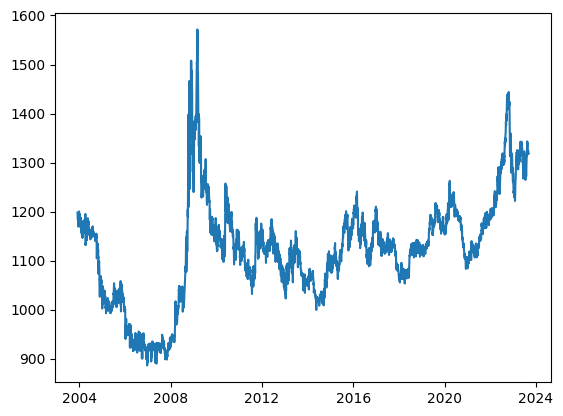

In [ ]:
!pip install matplotlib==3.7.1
import yfinance as yf
import matplotlib.pyplot as plt

start_date = '2000-01-01'
end_date = today
currency_pair = 'KRW=X'

data = yf.download(currency_pair, start=start_date, end=end_date)
plt.plot(data['Close'])
plt.show()

In [ ]:
#write your code

### 4-3. 데이터 전처리
- 질문 :

위의 코드를 기반으로 데이터에서 Close데이터만 추출한 후 아래와 같이 전처리를 진행해줘.
전처리로 새로운 컬럼을 만들어 낼꺼야. Close 값을 기준으로 30일전부터 하루전까지의 데이터로 30개의 컬럼을 만들어 줘. 모두 만들면 결측치가 있는 행은 모두 삭제해줘. 완료된 데이터를 기억해줘

In [ ]:
import yfinance as yf
import pandas as pd

start_date = '2000-01-01'
end_date = today
currency_pair = 'KRW=X'

data = yf.download(currency_pair, start=start_date, end=end_date)
data = data[['Close']]
for i in range(1, 31):
    data[f'Close_{i}'] = data['Close'].shift(i)
data.dropna(inplace=True)
data.to_excel('preprocessed_data.xlsx')

[*********************100%***********************]  1 of 1 completed


<ipython-input-6-e4aa73ce8c2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Close_{i}'] = data['Close'].shift(i)
<ipython-input-6-e4aa73ce8c2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Close_{i}'] = data['Close'].shift(i)
<ipython-input-6-e4aa73ce8c2c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
#write your code


### 4-4.향후 환율 예측하기
- 질문 :

위의 코드를 활용하여 만들어진 전처리가 완료된 데이터에서

Train 데이터는 2000년 1월 1일부터 2022년 12월 31일 까지의 데이터
Test 데이터는 2023년 1월 1일부터 오늘까지의 데이터로 세팅하고

target(y) 값을 Close로 설정하고
feature(X) 값은 .drop 메서드를 활용하여 Close값을 제외한 데이터로 설정한다

 Close값을 예측하는 예측 모델(RandomForest)을 만들어줘.

위의 모델이 완성되면
실제 Test데이터의  실제값과 예측값을 비교할 수 있게 시각화해줘

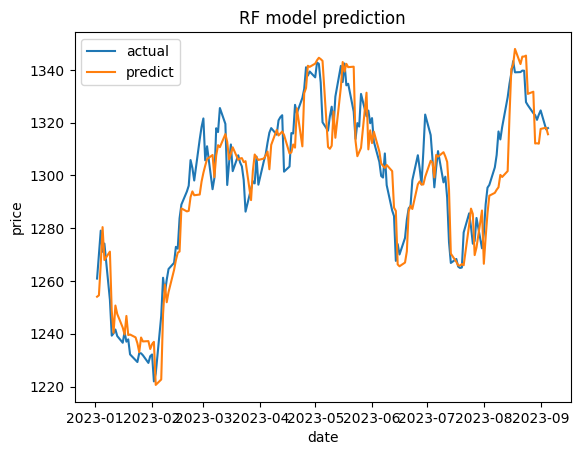

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# yf.download() 함수를 사용하여 종가 데이터를 가져옵니다.
# 'KRW=X'는 한국 원화 대 미국 달러를 의미합니다.
df = yf.download('KRW=X', start='2000-01-01', end=today, progress=False)
# df = df['Close']
# 30일 전부터 하루 전까지의 데이터로 30개의 컬럼을 만듭니다.
for i in range(1, 31):
    df[f'Close_t-{i}'] = df['Close'].shift(i)

# 결측치가 있는 행은 모두 삭제합니다.
df.dropna(inplace=True)

# Train 데이터와 Test 데이터로 분리합니다.
train = df.loc['2000-01-01':'2022-12-31'][df.columns.difference(['Open', 'High', 'Low','Adj Close', 'Volume'])]
test = df.loc['2023-01-01':today][df.columns.difference(['Open', 'High', 'Low','Adj Close', 'Volume'])]

# target(y) 값을 Close로, feature(X) 값은 Close를 제외한 데이터로 설정합니다.
X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']

# RandomForest 모델을 사용하여 Close 값을 예측합니다.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 예측값과 실제값을 비교하는 그래프를 시각화합니다.
plt.plot(test.index, y_test, label='actual')
plt.plot(test.index, y_pred, label='predict')
plt.legend()
plt.title('RF model prediction')
plt.xlabel('date')
plt.ylabel('price')
plt.show()


추가질문_Deep Learning

'''

아래의 코드는 머신러닝 랜덤포레스트를 활용해서 만든 코드야
이 모델의 정확도를 높이기 위해서 딥러닝모델로 변경을 해보려고 해 코드를 수정해서 알려줘

import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# yf.download() 함수를 사용하여 종가 데이터를 가져옵니다.
# 'KRW=X'는 한국 원화 대 미국 달러를 의미합니다.
df = yf.download('KRW=X', start='2000-01-01', end=today, progress=False)
# df = df['Close']
# 30일 전부터 하루 전까지의 데이터로 30개의 컬럼을 만듭니다.
for i in range(1, 31):
    df[f'Close_t-{i}'] = df['Close'].shift(i)

# 결측치가 있는 행은 모두 삭제합니다.
df.dropna(inplace=True)

# Train 데이터와 Test 데이터로 분리합니다.
train = df.loc['2000-01-01':'2022-12-31'][df.columns.difference(['Open', 'High', 'Low','Adj Close', 'Volume'])]
test = df.loc['2023-01-01':today][df.columns.difference(['Open', 'High', 'Low','Adj Close', 'Volume'])]

# target(y) 값을 Close로, feature(X) 값은 Close를 제외한 데이터로 설정합니다.
X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']

# RandomForest 모델을 사용하여 Close 값을 예측합니다.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 예측값과 실제값을 비교하는 그래프를 시각화합니다.
plt.plot(test.index, y_test, label='actual')
plt.plot(test.index, y_pred, label='predict')
plt.legend()
plt.title('RF model prediction')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

'''

4889/4889 - 80s - loss: 8.8621e-04 - 80s/epoch - 16ms/step
4/4 [==============================] - 1s 16ms/step


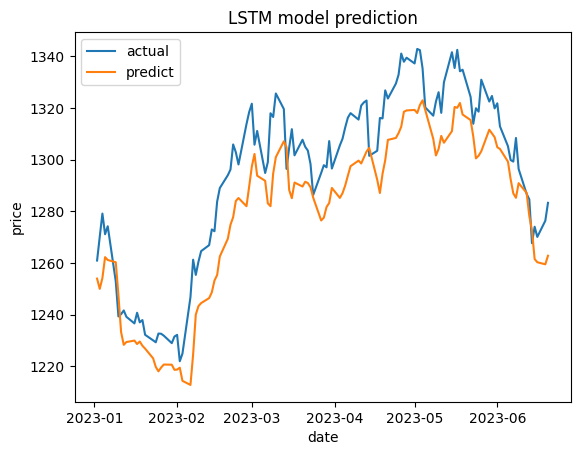

In [ ]:
!pip install tensorflow
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

df = yf.download('KRW=X', start='2000-01-01', end=today, progress=False)

for i in range(1, 31):
    df[f'Close_t-{i}'] = df['Close'].shift(i)
df.dropna(inplace=True)

train = df.loc['2000-01-01':'2022-12-31']['Close']
test = df.loc['2023-01-01':today]['Close']

scaler = MinMaxScaler()
train = scaler.fit_transform(train.values.reshape(-1,1))

# 30일 데이터를 기반으로 다음 날을 예측하기 위한 데이터를 만듭니다.
X_train = []
y_train = []

for i in range(30, len(train)):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = df[len(df) - len(test) - 30:]['Close']
inputs = inputs.values.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

plt.plot(test.index, test.values, label='actual')
plt.plot(test.index, predicted_price, label='predict')
plt.legend()
plt.title('LSTM model prediction')
plt.xlabel('date')
plt.ylabel('price')
plt.show()


In [ ]:
#write your code



#추가. code interpreter를 통한 동일예제풀이

https://chat.openai.com/share/8fb53e3f-80f3-4fd7-b7a3-ba544b875dc5

Epoch 1/100
3404/3404 - 20s - loss: 0.0082 - 20s/epoch - 6ms/step
Epoch 2/100
3404/3404 - 15s - loss: 3.3046e-04 - 15s/epoch - 4ms/step
Epoch 3/100
3404/3404 - 9s - loss: 3.3318e-04 - 9s/epoch - 3ms/step
Epoch 4/100
3404/3404 - 9s - loss: 3.3360e-04 - 9s/epoch - 3ms/step
Epoch 5/100
3404/3404 - 9s - loss: 3.3029e-04 - 9s/epoch - 3ms/step
Epoch 6/100
3404/3404 - 9s - loss: 3.3096e-04 - 9s/epoch - 3ms/step
Epoch 7/100
3404/3404 - 9s - loss: 3.2726e-04 - 9s/epoch - 3ms/step
Epoch 8/100
3404/3404 - 9s - loss: 3.3244e-04 - 9s/epoch - 3ms/step
Epoch 9/100
3404/3404 - 11s - loss: 3.2545e-04 - 11s/epoch - 3ms/step
Epoch 10/100
3404/3404 - 10s - loss: 3.2830e-04 - 10s/epoch - 3ms/step
Epoch 11/100
3404/3404 - 9s - loss: 3.2983e-04 - 9s/epoch - 3ms/step
Epoch 12/100
3404/3404 - 9s - loss: 3.2546e-04 - 9s/epoch - 3ms/step
Epoch 13/100
3404/3404 - 9s - loss: 3.2913e-04 - 9s/epoch - 3ms/step
Epoch 14/100
3404/3404 - 9s - loss: 3.3326e-04 - 9s/epoch - 3ms/step
Epoch 15/100
3404/3404 - 9s - loss: 3.2

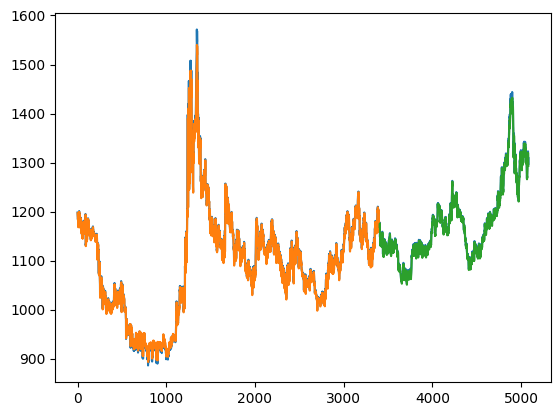

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_excel('2003~2023환율데이터.xlsx')
data.set_index('Date', inplace=True)
data = data[['Adj Close']]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# 추가. 시각화

In [ ]:
# 실행 후 다시 연결 끊고 진행 글씨체 ( 런타인 재시작 눌러줘야 함)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
vege_raw = [10.5, 19.5, 3.4, 18.6, 15.0, 7.9, 17.7, 7.8, 9.3, 3.9, 7.2, 15.1, 14.6, 15.4, 8.7, 13.3, 7.0, 17.2, 17.4, 7.1]
meat_raw = [17.0, 12.2, 9.4, 2.8, 18.0, 18.3, 0.5, 2.4, 8.9, 6.5, 11.6, 1.9, 11.7, 19.0, 19.9, 4.8, 2.3, 6.5, 13.8, 11.1]
cstock_raw = [15.0, 10.5, 15.7, 19.3, 15.0, 8.2, 19.9, 6.8, 16.0, 0.7, 7.8, 10.9, 16.7, 13.7, 15.7, 12.3, 11.1, 7.7, 8.5, 6.4]
bstock_raw = [0.4, 2.3, 2.2, 19.5, 13.3, 14.0, 12.7, 18.8, 16.4, 16.9, 17.4, 19.4, 4.5, 5.5, 7.5, 0.1, 6.8, 10.7, 0.7, 7.3]
A_favor =[28.4, 32.1, 21.3, 40.4, 34.2, 19.8, 42.2, 19.2, 28.2, 9.4, 17.7, 30.5, 31.7, 32.7, 26.7, 29.6, 23.0, 29.9, 26.6, 15.7]
B_favor =[19.3, 14.4, 11.7, 5.7, 18.9, 19.4, 1.1, 4.9, 11.3, 7.5, 14.2, 2.7, 13.1, 21.5, 21.3, 5.3, 2.8, 9.4, 13.8, 11.1]
C_favor = [77.1, 79.5, 56.3, 87.6, 90.2, 59.1, 87.5, 43.6, 69.9, 28.0, 52.5, 66.0, 79.5, 89.5, 75.8, 67.5, 50.7, 69.7, 69.1, 42.5]
df = pd.DataFrame([vege_raw,meat_raw,cstock_raw,bstock_raw,A_favor,B_favor,C_favor]).T
df.columns = ['야채건더기','고기건더기','치킨육수','소고기육수','감칠맛','식감','맛점수']
df.head(4)

야채건더기  고기건더기  치킨육수  소고기육수   감칠맛    식감   맛점수
0   10.5   17.0  15.0    0.4  28.4  19.3  77.1
1   19.5   12.2  10.5    2.3  32.1  14.4  79.5
2    3.4    9.4  15.7    2.2  21.3  11.7  56.3
3   18.6    2.8  19.3   19.5  40.4   5.7  87.6

Intercept    20.493136
치킨육수          2.052032
야채건더기         1.874720
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.13
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.53e-09
Time:                        23:10:57   Log-Likelihood:                -63.088
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      17   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53416 (\N{HANGUL SYLLABLE KIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48139 (\N{HANGUL SYLLABLE MIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

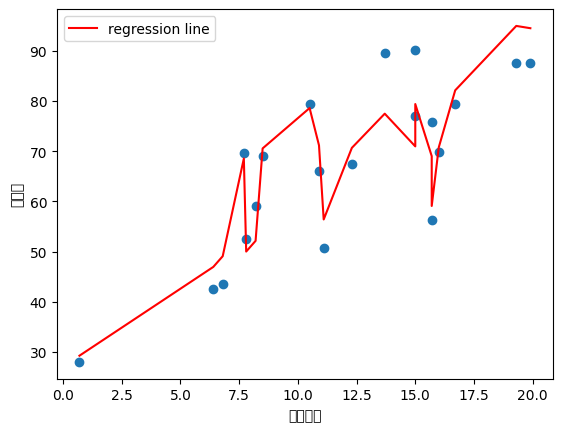

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Fit regression model
model = smf.ols(formula='맛점수 ~ 치킨육수 + 야채건더기', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())

# Plot regression line
plt.scatter(df['치킨육수'], df['맛점수'])
plt.plot(df['치킨육수'].sort_values(), results.predict(df[['치킨육수','야채건더기']].sort_values(by='치킨육수')), 'r', label='regression line')
plt.legend()
plt.xlabel('치킨육수')
plt.ylabel('밋점수')
plt.show()

### 회귀분석 2차원 -> 3차원 변경 프롬프트

ChatGPT 프롬프트 - 상위의 코드를 기반으로 3차원으로 구현해줘

Intercept    20.493136
치킨육수          2.052032
야채건더기         1.874720
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    맛점수   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.13
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.53e-09
Time:                        23:10:58   Log-Likelihood:                -63.088
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      17   BIC:                             135.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53416 (\N{HANGUL SYLLABLE KIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50556 (\N{HANGUL SYLLABLE YA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

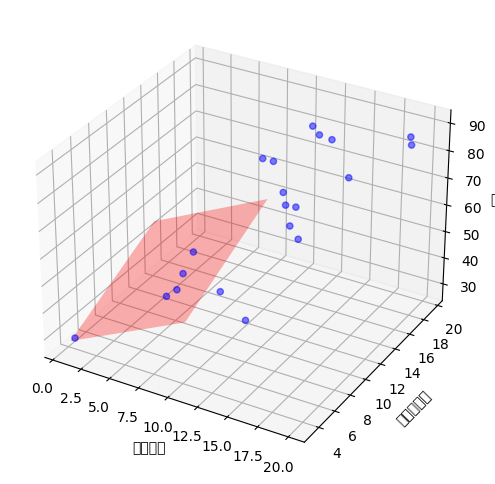

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Fit regression model
model = smf.ols(formula='맛점수 ~ 치킨육수 + 야채건더기', data=df)
results = model.fit()

# Print summary of results
print(results.params)
print(results.summary())

# Set up 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the raw data
ax.scatter(df['치킨육수'], df['야채건더기'], df['맛점수'], color='blue', alpha=0.5)

# Generate coordinates for hyperplane
x_surf = np.arange(df['치킨육수'].min(), df['치킨육수'].max(), 10)
y_surf = np.arange(df['야채건더기'].min(), df['야채건더기'].max(), 10)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Predict the value
newX = pd.DataFrame({'치킨육수': x_surf.ravel(), '야채건더기': y_surf.ravel()})
predicted = results.predict(newX)

# Plot the surface
ax.plot_surface(x_surf, y_surf, predicted.values.reshape(x_surf.shape), color='red', alpha=0.3)

# Set labels
ax.set_xlabel('치킨육수')
ax.set_ylabel('야채건더기')
ax.set_zlabel('맛점수')

plt.show()


In [ ]:
#ChatGPT 프롬프트 - 상위의 코드를 기반으로 3차원으로 구현해줘

# 추가. 이미지기반 텍스트추출

프롬프트 : https://chat.openai.com/share/0b69c936-44a9-4379-97f8-14ad14390427

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 21.4 MB/s eta 0:00:00


In [ ]:
import easyocr
import urllib
from PIL import Image
import requests
from io import BytesIO

# 이미지 URL. 원하는 이미지의 URL로 변경하세요.
# url = "https://yt3.googleusercontent.com/LLBs--0ibmuMMaeFS97PikU4EPMS_xxes0um2wp2buyhfWuX9DzaqwVpLaDZOpvNYGWZPHdyoqk=s176-c-k-c0x00ffffff-no-rj"
url = 'https://yt3.googleusercontent.com/ytc/AGIKgqNnve60MQ7pQ6VrLB3gyqi8IW1rPBbx9HNKQhvlpA=s176-c-k-c0x00ffffff-no-rj'
# url = 'https://search.pstatic.net/common/?src=http%3A%2F%2Fshop1.phinf.naver.net%2F20230417_137%2F1681696011982fVWCD_JPEG%2F3013348971478736_86854855.jpg&type=sc960_832'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# EasyOCR Reader 생성. 'ko'은 한국어를 의미합니다.
# reader = easyocr.Reader(['ko'])
reader = easyocr.Reader(['en'])

# OCR 수행
result = reader.readtext(img)

# 결과 출력
for i in result:
    print(i[1])

img.close()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteGMF


- 응용

증명서 그림파일에서 특정 부분만 캡처

In [ ]:
#증명서 다운받기 https://drive.google.com/file/d/10jkRoaLp96QkW-WxtdYylKoyYIbp_H23/view?usp=sharing
#pc/colab용
!pip install --upgrade gdown
import gdown
google_path = "https://drive.google.com/uc?id="
file_id = '10jkRoaLp96QkW-WxtdYylKoyYIbp_H23'
output_name = "datascience_cert.png"
gdown.download(google_path+file_id,output_name,quiet=False)


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From: https://drive.google.com/uc?id=10jkRoaLp96QkW-WxtdYylKoyYIbp_H23
To: /content/datascience_cert.png
100%|██████████| 99.0k/99.0k [00:00<00:00, 92.3MB/s]


'datascience_cert.png'

In [ ]:
#참고 프롬프트 - https://chat.openai.com/share/a42c1b1a-6f7b-4e57-b6bd-c0c6393384ae
#증명서에서 등급 위치 추출하기
import cv2
from google.colab import files

def extract_region(image_path, x, y, width, height, output_path):
    # 이미지 로드
    image = cv2.imread(image_path)

    # 부분 이미지 추출
    region = image[y:y+height, x:x+width]

    # 추출된 부분 이미지 저장
    cv2.imwrite(output_path, region)

    print("추출이 완료되었습니다.")

# 업로드한 이미지 파일 경로 설정
image_path = "/content/datascience_cert.png"

# 추출할 부분의 좌표와 크기 설정
x = 168
y = 470
width = 65
height = 20

# 부분 이미지를 저장할 경로 설정
output_path = "output.jpg"

# 이미지에서 특정 부분 추출
extract_region(image_path, x, y, width, height, output_path)


추출이 완료되었습니다.


In [ ]:
!pip install pillow
!pip install easyocr
from PIL import Image
import easyocr

#변경된 이미지에서 특정 부분만 캡쳐
img = Image.open("output.jpg")

# EasyOCR Reader 생성. 'en'은 영어를 의미합니다.
reader = easyocr.Reader(['en'])

# OCR 수행
result = reader.readtext(img)

# 결과 출력
for i in result:
    print(i[1])
#OCR처리

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.1 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteAdvanced


In [ ]:
result

# 추가. 워드클라우드 제작하기

참고프롬프트 : https://chat.openai.com/share/998fcf01-9a49-4a8f-ba0e-5f8121ce72d0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.8 MB/s eta 0:00:00
Selecting previously unselected package fonts-nanum.
(Reading database ... 129824 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ..

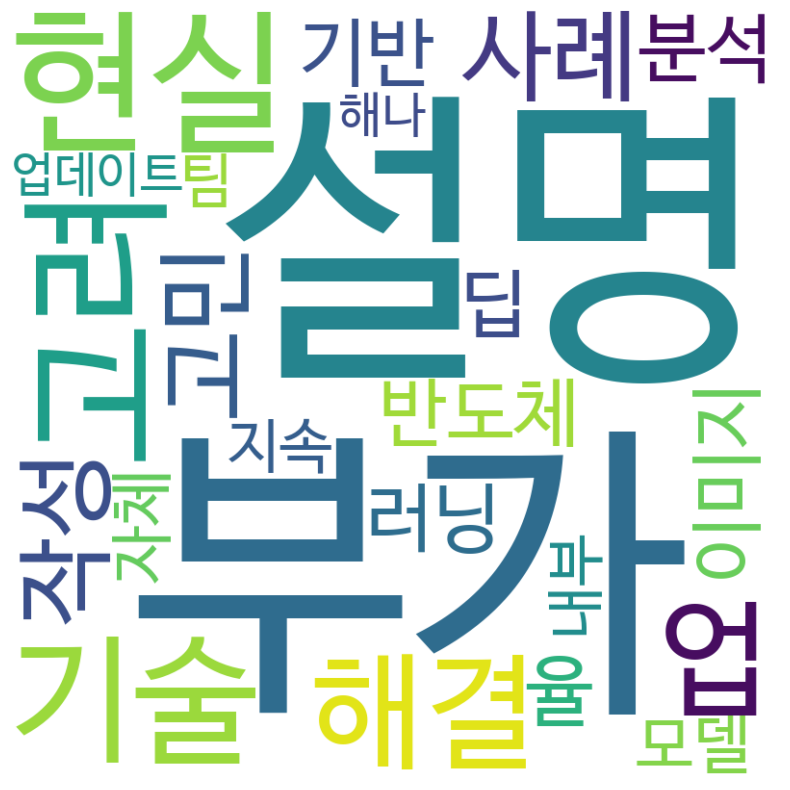

In [ ]:
!pip install wordcloud matplotlib konlpy

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.font_manager as fm

def create_wordcloud(text):
    # 텍스트 데이터를 형태소 분석을 통해 분리합니다.
    okt = Okt()
    tokens = okt.nouns(text)

    # 형태소 분석의 결과를 문자열로 변환합니다.
    token_string = " ".join(tokens)

    # wordcloud를 생성합니다.
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        background_color='white',
        width=800,
        height=800
    ).generate(token_string)

    # wordcloud를 화면에 출력합니다.
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 텍스트 데이터
text = """
(부가설명)  현실성 고려 없이 AI기술로 해결해야하는 현업사례 고민해보고 자유롭게 작성해주세요
Ex) 반도체 이미지를 기반으로 수율분석 딥러닝 모델을 자체적으로 만들고 지속적으로 팀내부에서 업데이트 해나가고 싶다.
"""

create_wordcloud(text)


# 추가. 누끼따기

참고프롬프트 : https://chat.openai.com/share/f8a6d101-b476-4261-bc39-8b903cc33f6a

In [ ]:
#샘플사진 다운받기 https://drive.google.com/file/d/1lTclhEHA2kAkO-v4VZ3wppmxKZcD-w1a/view?usp=sharing
#pc/colab용
!pip install --upgrade gdown
import gdown
google_path = "https://drive.google.com/uc?id="
file_id = '1lTclhEHA2kAkO-v4VZ3wppmxKZcD-w1a'
output_name = "face_nukki_sample.png"
gdown.download(google_path+file_id,output_name,quiet=False)


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From: https://drive.google.com/uc?id=1lTclhEHA2kAkO-v4VZ3wppmxKZcD-w1a
To: /content/face_nukki_sample.png
100%|██████████| 510k/510k [00:00<00:00, 78.8MB/s]


'face_nukki_sample.png'

In [ ]:
import cv2
import numpy as np

# 이미지를 불러옵니다
img = cv2.imread('face_nukki_sample.png')

# 마스크를 만듭니다
mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 관심 영역을 설정합니다 (x, y, w, h)
rect = (50, 50, 450, 290)

# GrabCut 알고리즘을 적용합니다
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경에 해당하는 부분을 찾아내어 마스크를 만듭니다
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 원본 이미지에 마스크를 곱하여 배경을 제거합니다
img = img * mask2[:, :, np.newaxis]

# 결과를 파일로 저장합니다
cv2.imwrite('output_basic.png', img)


True

In [ ]:
import requests

# dlib의 얼굴 랜드마크 모델 URL
url = "http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2"

# 모델 파일을 다운로드합니다.
r = requests.get(url, allow_redirects=True)

# .bz2 형식으로 받아 압축을 풀어줘야 합니다.
open('shape_predictor_68_face_landmarks.dat.bz2', 'wb').write(r.content)

# 압축 해제
import bz2
zipfile = bz2.BZ2File('shape_predictor_68_face_landmarks.dat.bz2')
data = zipfile.read()

# 압축을 해제한 후 .dat 파일로 저장합니다.
open('shape_predictor_68_face_landmarks.dat', 'wb').write(data)
# 필요한 라이브러리를 불러옵니다
import cv2
import dlib
import numpy as np

# 사전 학습된 dlib의 얼굴 인식 모델과 랜드마크 모델을 불러옵니다.
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat') # 웹에서 다운로드 받아야 합니다.

# 이미지를 불러옵니다
img = cv2.imread('face_nukki_sample.png') # 이미지 경로를 입력하세요
# 이미지에서 얼굴을 인식합니다
faces = detector(img)
mask = np.zeros(img.shape[:2], np.uint8)

for face in faces:
    x1 = face.left()
    y1 = face.top()
    x2 = face.right()
    y2 = face.bottom()

    landmarks = predictor(img, face)

    # 얼굴 랜드마크를 사용하여 얼굴 주위에 다각형을 그립니다
    points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        points.append((x, y))

    points = np.array(points, np.int32)
    convexhull = cv2.convexHull(points)

    # 누끼를 따기 위한 마스크를 만듭니다
    cv2.fillConvexPoly(mask, convexhull, 1)

# grabCut 알고리즘을 사용하여 누끼를 따냅니다
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

iterCount = 5
rect = (0,0,1,1) # dummy rect

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_MASK)

# 마스크를 이진 이미지로 바꾸어 줍니다
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# 이미지에 마스크를 적용하여 누끼를 따냅니다
img = img*mask2[:,:,np.newaxis]

# 결과 이미지를 저장합니다
cv2.imwrite('output1.png', img)



True

In [ ]:
#사람의 형상을 누끼다기는 어렵다. ( 전문적인 지식이 필요 )
import cv2
import numpy as np

# HOGDescriptor를 이용한 사람 인식
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 이미지를 불러옵니다
img = cv2.imread('face_nukki_sample.png') # 이미지 경로를 입력하세요

# 이미지에서 사람을 인식합니다
boxes, weights = hog.detectMultiScale(img, winStride=(4, 4), padding=(8, 8), scale=1.05)

mask = np.zeros(img.shape[:2], np.uint8)

for (x, y, w, h) in boxes:
    cv2.rectangle(mask, (x, y), (x + w, y + h), 1, thickness=-1)

# grabCut 알고리즘을 사용하여 누끼를 따냅니다
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

iterCount = 5
rect = (0,0,1,1) # dummy rect

cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterCount, cv2.GC_INIT_WITH_MASK)

# 마스크를 이진 이미지로 바꾸어 줍니다
mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# 이미지에 마스크를 적용하여 누끼를 따냅니다
img = img*mask2[:,:,np.newaxis]

# 결과 이미지를 저장합니다
cv2.imwrite('output2.png', img)


True

-오류발생발견
https://chat.openai.com/share/1b74d743-6450-45db-9442-cfbb66e3399a

# 추가.  Deep learning 기반 이미지 분류생성기 제작

## 딥러닝을 활용한 불량품 & 양품 판단모델만들기

- https://chat.openai.com/share/9e35020f-fe8b-4b1d-881d-fb8772352b30
- 20230713 업데이트 _ 코드인터프리터 ( https://chat.openai.com/share/c7b4def1-a10f-4e48-a390-f877dccedad2 )

In [ ]:
# 이미지 다운로드

#데이터 다운로드
# [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
!pip install gdown==4.5.1
import gdown
import zipfile
# https://drive.google.com/file/d/1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt/view?usp=sharing
google_path = "https://drive.google.com/uc?id="
file_id = '1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt'
output_name = "bus_bike_data.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("bus_bike_data.zip")
fantasy_zip.extractall()

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14931 sha256=1111c4594e3a546be571303970d04db2ed20556778a08ef84d12f44321a2bc7b
  Stored in directory: /root/.cache/pip/wheels/38/72/83/dab5cb8321023eb1549d7a7d7f564b479ed4cf71edb70ddad6
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Downloading...
From: https://drive.google.com/uc?id=1tl75HY2vZr7Mrag2Pd4-5tZsa5B3-YPt
To: /content/bus_bike_data.zip
100%|██████████| 12.8M/12.8M [00:00<00:00, 102MB/s] 


- 미션 : 버스/오토바이 사진 200개를 기반으로 딥러닝 모델을 학습시키기

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/training_data',  # 데이터 경로
    target_size=(800, 800),  # 이미지 크기
    batch_size=16,
    class_mode='binary',
    subset='training')  # training subset

validation_generator = train_datagen.flow_from_directory(
    '/content/training_data',  # same directory as training data
    target_size=(800, 800),
    batch_size=16,
    class_mode='binary',
    subset='validation')  # validation subset
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, validation_data=validation_generator, epochs=40)


from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(800, 800))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)

    if prediction < 0.5:
        return 'This image is a motorcycle.'
    else:
        return 'This image is a bus.'

Found 318 images belonging to 2 classes.
Found 79 images belonging to 2 classes.
Epoch 1/40
20/20 [==============================] - 36s 698ms/step - loss: 37.8521 - accuracy: 0.4717 - val_loss: 0.5878 - val_accuracy: 0.8608
Epoch 2/40
20/20 [==============================] - 8s 391ms/step - loss: 0.4387 - accuracy: 0.8082 - val_loss: 0.4369 - val_accuracy: 0.8481
Epoch 3/40
20/20 [==============================] - 9s 438ms/step - loss: 0.1473 - accuracy: 0.9560 - val_loss: 0.6504 - val_accuracy: 0.7848
Epoch 4/40
20/20 [==============================] - 9s 420ms/step - loss: 0.1600 - accuracy: 0.9654 - val_loss: 0.2446 - val_accuracy: 0.8861
Epoch 5/40
20/20 [==============================] - 8s 397ms/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.2993 - val_accuracy: 0.8861
Epoch 6/40
20/20 [==============================] - 8s 385ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.2738 - val_accuracy: 0.8861
Epoch 7/40
20/20 [==============================] - 8s 414ms/step

In [ ]:
# 800x800 으로 이미지 변환하기
# file_path = input("업로드한 파일의 경로를 복사해서 붙여넣으세요:")
file_path  ="/content/버스.jfif"
from PIL import Image
import os
def add_keyword_to_filename(file_path, keyword):
    file_name, file_extension = os.path.splitext(file_path)
    new_file_name = file_name + keyword + file_extension
    return new_file_name

def resize_image(input_image_path, output_image_path, size):
    with Image.open(input_image_path) as image:
        resized_image = image.resize(size)
        resized_image.save(output_image_path)

input_file = file_path  # Replace with the path to your input .jpg file
output_file = add_keyword_to_filename(input_file, "(output)")  # Replace with the desired output .jpg file path
size = (800, 800)  # Desired output size (width, height)
resize_image(input_file, output_file, size)
predict_image(model,output_file)

1/1 [==============================] - 0s 70ms/step


'This image is a bus.'

## 코드인터프리터해결

In [ ]:
import os
import zipfile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Path to the zip file
zip_file_path = "/content/bus_bike_data (1).zip" # Replace with the actual path

# Extract the zip file
extract_folder_path = "/content" # Replace with the desired path
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Paths to the image folders
bus_folder_path = os.path.join(extract_folder_path, 'training_data', 'bus')
bike_folder_path = os.path.join(extract_folder_path, 'training_data', 'bike')

# Set image size. All images will be resized to this size.
image_size = (64, 64)

# Initialize lists to store the data
images = []
labels = []

# Load the images and labels
for folder_name, label in [(bus_folder_path, 0), (bike_folder_path, 1)]:
    for filename in os.listdir(folder_name):
        img_path = os.path.join(folder_name, filename)

        # Read the image
        img = cv2.imread(img_path)

        # Resize the image
        img = cv2.resize(img, image_size)

        # Normalize pixel values to [0, 1]
        img = img / 255.0

        # Add the image and label to their respective lists
        images.append(img)
        labels.append(label)

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets
images_train, images_val, labels_train, labels_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot vectors
labels_train = to_categorical(labels_train, num_classes=2)
labels_val = to_categorical(labels_val, num_classes=2)

# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax'),
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Set a callback to save the model during training
checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# Train the model
model.fit(images_train, labels_train,
          validation_data=(images_val, labels_val),
          epochs=10,
          callbacks=[checkpoint])


Epoch 1/10
10/10 [==============================] - 10s 63ms/step - loss: 0.7935 - accuracy: 0.5016 - val_loss: 0.6904 - val_accuracy: 0.4250
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 0.6412 - accuracy: 0.6278 - val_loss: 0.5717 - val_accuracy: 0.7875
Epoch 3/10
10/10 [==============================] - 0s 16ms/step - loss: 0.5464 - accuracy: 0.7445 - val_loss: 0.3997 - val_accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - 0s 16ms/step - loss: 0.4703 - accuracy: 0.7792 - val_loss: 0.3319 - val_accuracy: 0.9250
Epoch 5/10
10/10 [==============================] - 0s 15ms/step - loss: 0.4000 - accuracy: 0.8360 - val_loss: 0.2980 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 0s 15ms/step - loss: 0.3719 - accuracy: 0.8517 - val_loss: 0.2456 - val_accuracy: 0.9250
Epoch 7/10
10/10 [==============================] - 0s 16ms/step - loss: 0.2567 - accuracy: 0.8959 - val_loss: 0.2145 - val_accuracy: 0.9125
Epoch 8/10
1

In [ ]:
!pip install --upgrade keras tensorflow

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

# Path to the saved model
model_path = "model.h5"

# Path to the new image
image_path = "/content/3542441766_20221011142513_6483076530.jpg" # Replace with the actual path

# Load the saved model
model = load_model(model_path)

# Load the image
img = load_img(image_path, target_size=image_size)

# Convert the image to an array
img_array = img_to_array(img)

# Normalize pixel values to [0, 1]
img_array = img_array / 255.0

# Add an extra dimension for batch size
img_array = np.expand_dims(img_array, axis=0)

# Use the model to predict the class of the image
prediction = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)

# Print the predicted class
if predicted_class == 0:
    print("The image is a bus.")
else:
    print("The image is a bike.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

ImportError: ignored

## Teachable Machine 활용
https://teachablemachine.withgoogle.com/train/image

# 새 섹션

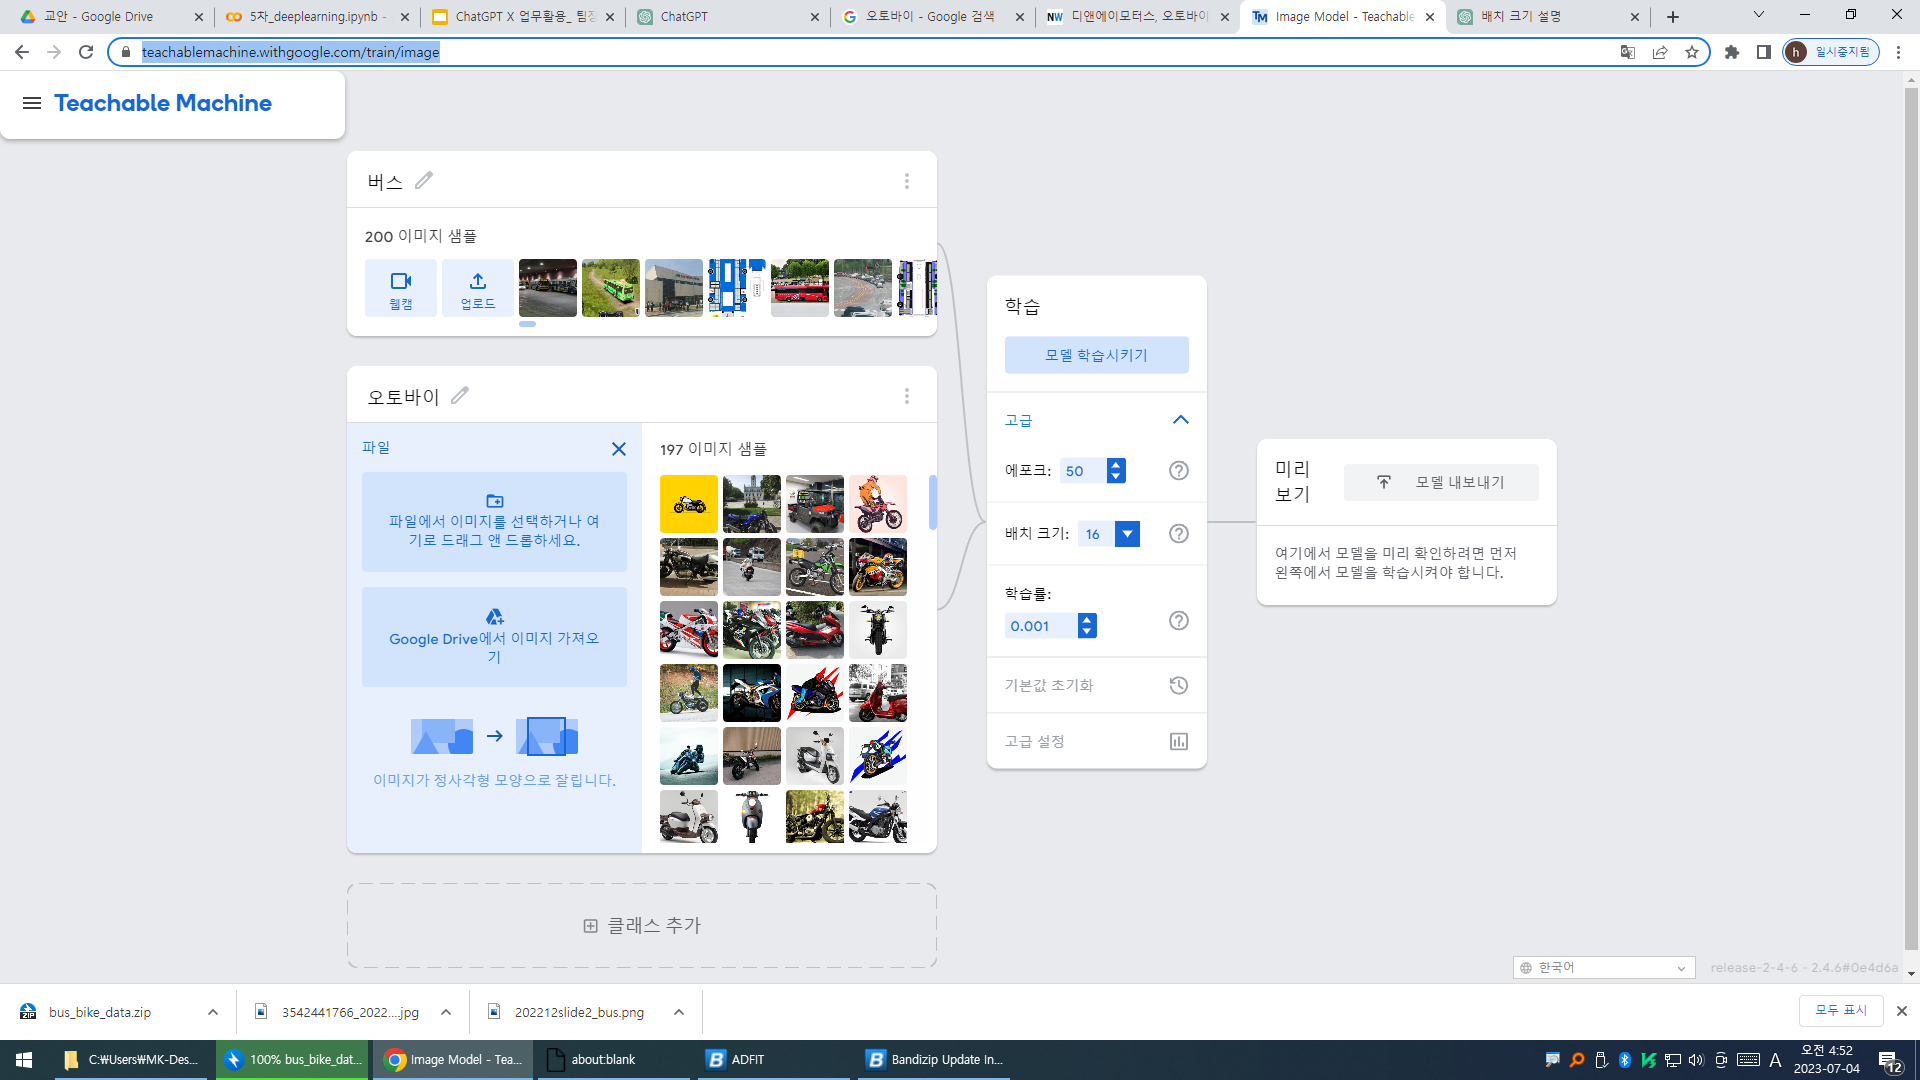

In [ ]:
#teachable 머신에서 제작한 모델

# 이미지 다운로드

#데이터 다운로드
# [PC/colab 통합]파일다운로드(기본) 및 압축파일 해제
!pip install gdown==4.5.1
import gdown
import zipfile
# https://drive.google.com/file/d/11kAktrhjC5uVeq3D-P5tBy-bI9zVneVX/view?usp=sharing
google_path = "https://drive.google.com/uc?id="
file_id = '11kAktrhjC5uVeq3D-P5tBy-bI9zVneVX'
output_name = "deeplearning_model.zip"
gdown.download(google_path+file_id,output_name,quiet=False)
fantasy_zip = zipfile.ZipFile("deeplearning_model.zip")
fantasy_zip.extractall()


Downloading...
From: https://drive.google.com/uc?id=11kAktrhjC5uVeq3D-P5tBy-bI9zVneVX
To: /content/deeplearning_model.zip
100%|██████████| 2.45M/2.45M [00:00<00:00, 154MB/s]


In [ ]:
!pip install --upgrade pillow
#런타임 다시시작

In [ ]:

from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

new_img_path = input("평가할 이미지의 경로를 넣어주세요 : ")
# Replace this with the path to your image
image = Image.open(new_img_path).convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


평가할 이미지의 경로를 넣어주세요 : /content/3542441766_20221011142513_6483076530.jpg
1/1 [==============================] - 6s 6s/step
Class: 오토바이
Confidence Score: 0.99999905


# 추가 코드변환
VBA -> App script
- https://chat.openai.com/share/06252359-3f21-4715-b2a5-961d3845c8d7

In [ ]:
#VBA코드

# Sub ChangeFontToArial()
#     Dim sld As Slide
#     Dim shp As Shape

#     ' Loop through every slide
#     For Each sld In ActivePresentation.Slides
#         ' Loop through every shape in the slide
#         For Each shp In sld.Shapes
#             ' Check if the shape has text
#             If shp.HasTextFrame Then
#                 ' If the text frame has text, change the font
#                 If shp.TextFrame.HasText Then
#                     shp.TextFrame.TextRange.Font.Name = "Arial"
#                 End If
#             End If
#         Next shp
#     Next sld
# End Sub



In [ ]:
#App script 구문

# function changeFontToArial() {
#   var presentation = SlidesApp.getActivePresentation();
#   var slides = presentation.getSlides();

#   for (var i = 0; i < slides.length; i++) {
#     var shapes = slides[i].getShapes();

#     for (var j = 0; j < shapes.length; j++) {
#       var textRange = shapes[j].getText();

#       // Check if the shape has text
#       if (textRange.asString().length > 0) {
#         var textStyle = textRange.getTextStyle();
#         textStyle.setFontFamily('Arial');
#       }
#     }
#   }
# }


## 코드변환 미션 - 프롬프트만으로 GUI프로그램 제작하기
- GUI프로그램으로
특정단어를 입력하고, 원하는 저장위치를 지정하면
관련된 기사내용/본문내용/URL이 함께 포함된 엑셀이
저장되는 프로그램 제작하기

- (주의 프롬프트 보지않고 직접 만들어보기 https://chat.openai.com/share/6c3ff522-42a4-489e-b7c4-748d3ebfbed0 )

In [ ]:
#기본기능
!pip install requests==2.28.2
!pip install pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 검색어와 URL 설정
search_word = '생성형AI'
url = f'https://search.naver.com/search.naver?query={search_word}&where=news'

# HTTP GET 요청
response = requests.get(url)

# BeautifulSoup을 이용해 HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 뉴스 기사 제목과 링크 추출
news_titles = soup.select('.news_tit')

# 제목과 링크를 저장할 리스트 초기화
titles = []
links = []

# 제목과 링크를 리스트에 저장
for title in news_titles:
    titles.append(title.text)
    links.append(title.get('href'))

# 리스트를 DataFrame으로 변환
df = pd.DataFrame({'Title': titles, 'Link': links})

# DataFrame을 Excel 파일로 저장
df.to_excel('news_titles_and_links.xlsx', index=False)


# COT방식을 통한 코드 개발

- https://chat.openai.com/share/1107b8c8-0718-46b4-9412-607ae85828cd
- https://chat.openai.com/share/4aa1d8ab-73b0-4fb4-9408-14946f35c3f8